### Prototyping the Analysis Pipeline for the Predicting 5-year Survivability of Colorectal Cancer Patients

_Write in this notebook all the stages required to prototype your data analysis pipeline according to the project instructions._

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn
import shap

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Do your analysis from here...

# Take advantage of jupyter notebooks from previous courses! (DSHI?😉)

## Colorectal Cancer Dataset

### Dataset

The *Colorectal Cancer Global Dataset & Predictions* is a comprehensive dataset containing demographic, clinical, lifestyle, and treatment-related features relevant to colorectal cancer (CRC). It concists of 16749 rows and combines 6 numerical features with 22 categorical features, making it suitable for descriptive, diagnostic, and predictive analysis.

Colorectal cancer is one of the leading causes of cancer-related deaths worldwide. Since survival rates vary drastically depending on stage at diagnosis and other factors, clinicians face challenges in providing accurate, data-driven prognosis. The dataset addresses this gap by supporting the development of predictive models that estimate 5-year survival probabilities, thereby contributing to personalized medicine and improved risk stratification.

The intended target users are clinicians and healthcare providers, who can use the survival predictions to support clinical decision-making, tailor treatment strategies, and allocate resources effectively.

By integrating predictive analytics into an interactive dashboard, the project aims to bridge clinical needs with patient-centered care, offering an intuitive, transparent, and supportive tool.

---

### Exploratory Data Analysis

In [2]:
df = pd.read_csv("colorectal_cancer_dataset.csv", sep=";")

#### Data Inspection

- Inspecting the first 10 rows.

In [3]:
df.head(10)

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes
5,6,Japan,69,M,Localized,71,No,No,Yes,Obese,...,No,No,82764,41,19,Urban,Developed,Moderate,Uninsured,No
6,7,Canada,79,F,Metastatic,59,No,Yes,No,Overweight,...,Yes,Yes,55948,51,6,Urban,Developed,High,Uninsured,Yes
7,8,Germany,89,F,Localized,19,Yes,No,Yes,Overweight,...,Yes,Yes,62667,57,11,Rural,Developed,High,Uninsured,Yes
8,9,USA,50,M,Regional,48,Yes,No,No,Overweight,...,No,Yes,47269,23,11,Rural,Developing,Low,Insured,Yes
9,10,Japan,54,F,Regional,71,No,No,Yes,Normal,...,Yes,No,92045,56,13,Urban,Developed,High,Uninsured,Yes


- Inspecting the number of rows and columns.

In [4]:
df.shape

(167497, 28)

- Inspecting the datatype of each feature.

In [5]:
df.dtypes

Patient_ID                     int64
Country                       object
Age                            int64
Gender                        object
Cancer_Stage                  object
Tumor_Size_mm                  int64
Family_History                object
Smoking_History               object
Alcohol_Consumption           object
Obesity_BMI                   object
Diet_Risk                     object
Physical_Activity             object
Diabetes                      object
Inflammatory_Bowel_Disease    object
Genetic_Mutation              object
Screening_History             object
Early_Detection               object
Treatment_Type                object
Survival_5_years              object
Mortality                     object
Healthcare_Costs               int64
Incidence_Rate_per_100K        int64
Mortality_Rate_per_100K        int64
Urban_or_Rural                object
Economic_Classification       object
Healthcare_Access             object
Insurance_Status              object
S

In [6]:
df.shape

(167497, 28)

#### Data Processing

- Removing features that are not relevant as they will not be used for further analysis and model training. For example, the project does not intend to build a model accounting for patients insurance status or healthcare costs as predictive measures for survival. Furthermore, the Healthcare_Access feature is removed as only patients with an ongoing contact with a healthcare provider will be relevant in the project. Country or area of residence will not be considered.

In [7]:
df.drop(columns=["Country", "Insurance_Status", "Healthcare_Costs", "Urban_or_Rural", "Economic_Classification", "Healthcare_Access"], inplace=True)

 - Converting the object datatypes to categorical and displaying the newly assigned datatypes.

In [8]:
df["Gender"] = df["Gender"].astype("category")
df["Cancer_Stage"] = df["Cancer_Stage"].astype("category")
df["Family_History"] = df["Family_History"].astype("category")
df["Smoking_History"] = df["Smoking_History"].astype("category")
df["Alcohol_Consumption"] = df["Alcohol_Consumption"].astype("category")
df["Obesity_BMI"] = df["Obesity_BMI"].astype("category")
df["Gender"] = df["Gender"].astype("category")
df["Cancer_Stage"] = df["Cancer_Stage"].astype("category")
df["Family_History"] = df["Family_History"].astype("category")
df["Smoking_History"] = df["Smoking_History"].astype("category")
df["Diet_Risk"] = df["Diet_Risk"].astype("category")
df["Physical_Activity"] = df["Physical_Activity"].astype("category")
df["Diabetes"] = df["Diabetes"].astype("category")
df["Inflammatory_Bowel_Disease"] = df["Inflammatory_Bowel_Disease"].astype("category")
df["Genetic_Mutation"] = df["Genetic_Mutation"].astype("category")
df["Screening_History"] = df["Screening_History"].astype("category")
df["Early_Detection"] = df["Early_Detection"].astype("category")
df["Treatment_Type"] = df["Treatment_Type"].astype("category")
df["Survival_5_years"] = df["Survival_5_years"].astype("category")
df["Mortality"] = df["Mortality"].astype("category")
df["Survival_Prediction"] = df["Survival_Prediction"].astype("category")
df.dtypes

Patient_ID                       int64
Age                              int64
Gender                        category
Cancer_Stage                  category
Tumor_Size_mm                    int64
Family_History                category
Smoking_History               category
Alcohol_Consumption           category
Obesity_BMI                   category
Diet_Risk                     category
Physical_Activity             category
Diabetes                      category
Inflammatory_Bowel_Disease    category
Genetic_Mutation              category
Screening_History             category
Early_Detection               category
Treatment_Type                category
Survival_5_years              category
Mortality                     category
Incidence_Rate_per_100K          int64
Mortality_Rate_per_100K          int64
Survival_Prediction           category
dtype: object

- Checking for null values. The dataset is complete.

In [9]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Survival_Prediction           0
dtype: int64

- Inspecting the first five rows of the processed dataset

In [35]:
df.head(25)

,Patient_ID,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Early_Detection,Treatment_Type,Survival_5_years,Mortality,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Survival_Prediction,Cancer_Stage_Encoded,Survival_Prediction_Encoded,Cluster
0,1,77.0,Male,LOCALIZED,69,No,No,Yes,Overweight,Low,...,Yes,COMBINATION,1,No,50,5,Yes,NaN,1,0
1,2,59.0,Male,LOCALIZED,33,No,No,No,Overweight,Moderate,...,No,CHEMOTHERAPY,1,No,37,25,Yes,NaN,1,1
2,3,66.0,Male,REGIONAL,17,No,Yes,No,Normal,Low,...,No,CHEMOTHERAPY,1,No,54,27,No,NaN,0,2
3,4,83.0,Male,REGIONAL,14,No,No,No,Obese,High,...,No,SURGERY,1,No,45,11,Yes,NaN,1,2
4,5,66.0,Male,LOCALIZED,34,No,Yes,No,Normal,Low,...,Yes,SURGERY,1,No,15,27,Yes,NaN,1,2
5,6,69.0,Male,LOCALIZED,71,No,No,Yes,Obese,Moderate,...,No,RADIOTHERAPY,0,No,41,19,No,NaN,0,1
6,7,79.0,Female,METASTATIC,59,No,Yes,No,Overweight,Low,...,Yes,CHEMOTHERAPY,1,Yes,51,6,Yes,NaN,1,0
7,8,89.0,Female,LOCALIZED,19,Yes,No,Yes,Overweight,Low,...,Yes,RADIOTHERAPY,1,Yes,57,11,Yes,NaN,1,2
8,9,50.0,Male,REGIONAL,48,Yes,No,No,Overweight,Moderate,...,Yes,RADIOTHERAPY,0,Yes,23,11,Yes,NaN,1,1
9,10,54.0,Female,REGIONAL,71,No,No,Yes,Normal,High,...,Yes,CHEMOTHERAPY,1,No,56,13,Yes,NaN,1,1


---

### Descriptive Analytics

#### **1. What is the age and gender distribution of colorectal cancer patients in the dataset?**

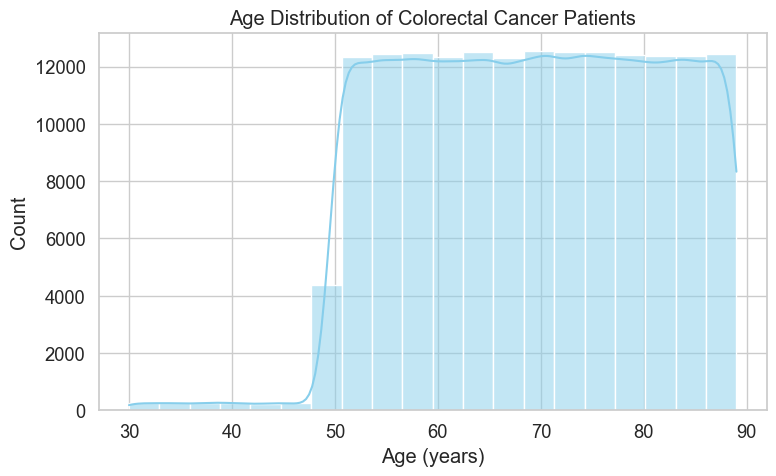

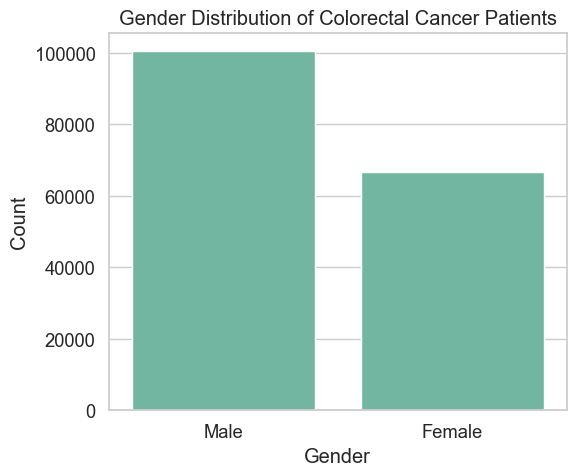

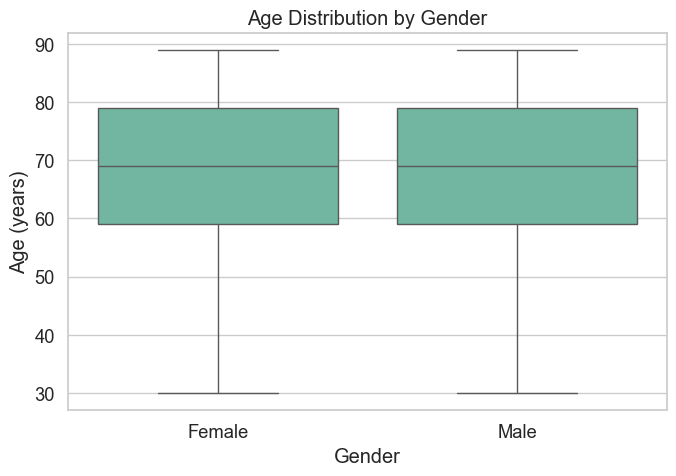

Gender Distribution
Male: 100686 patients (60.1%)
Female: 66811 patients (39.9%)

Age Descriptive Statistics (Overall)
count    167497.00000
mean         69.20078
std          11.87247
min          30.00000
25%          59.00000
50%          69.00000
75%          79.00000
max          89.00000
Name: Age, dtype: float64

Age Descriptive Statistics by Gender
           count       mean        std   min   25%   50%   75%   max
Gender                                                              
Female   66811.0  69.210370  11.893821  30.0  59.0  69.0  79.0  89.0
Male    100686.0  69.194416  11.858336  30.0  59.0  69.0  79.0  89.0


/var/folders/l1/1lql6dz54539f6sygqlch68h0000gn/T/ipykernel_32979/4193841898.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(gender_col)[age_col].describe())


In [11]:
age_col = "Age"
gender_col = "Gender"

# Clean and normalize data
df[age_col] = pd.to_numeric(df[age_col], errors="coerce")
df.loc[(df[age_col] < 0) | (df[age_col] > 120), age_col] = pd.NA

def normalize_gender(x):
    if pd.isna(x): return "Unknown"
    s = str(x).strip().lower()
    if s in {"m","male","man"}: return "Male"
    if s in {"f","female","woman"}: return "Female"
    return "Other/Unknown"

df[gender_col] = df[gender_col].apply(normalize_gender)

# Seaborn
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# 1. Age distribution (histogram with kernel density)
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=age_col, bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Colorectal Cancer Patients")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2. Gender distribution (bar chart)
plt.figure(figsize=(6,5))
sns.countplot(data=df, x=gender_col, order=df[gender_col].value_counts().index)
plt.title("Gender Distribution of Colorectal Cancer Patients")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3. Age distribution by gender (boxplot)
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x=gender_col, y=age_col)
plt.title("Age Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age (years)")
plt.tight_layout()
plt.show()

#Text outputs
print("Gender Distribution")
gender_counts = df[gender_col].value_counts(dropna=False)
gender_pct = df[gender_col].value_counts(normalize=True, dropna=False) * 100
for g in gender_counts.index:
    print(f"{g}: {gender_counts[g]} patients ({gender_pct[g]:.1f}%)")

print("\nAge Descriptive Statistics (Overall)")
print(df[age_col].describe())

print("\nAge Descriptive Statistics by Gender")
print(df.groupby(gender_col)[age_col].describe())

The patient population is largely male (60.1%) with females accounting for 39.9%. Patients are overall from the older population (median = 69 years; IQR = 59–79), with ages spanning 30–89 and a mean of approximately 69.2 (SD ≈ 11.9). Age profiles are essentially identical by gender (means and spread nearly the same), suggesting no major age-based imbalance between men and women. For our project, this confirms age as a key predictor to retain (and to display prominently in the dashboard), while gender may not contribute to predicitve analysis, but is still useful for comparative analysis.

#### **2. What is the distribution of cancer stages among patients?**

Cancer Cancer_Stage Distribution
REGIONAL: 66981 patients (40.0%)
LOCALIZED: 66799 patients (39.9%)
METASTATIC: 33717 patients (20.1%)


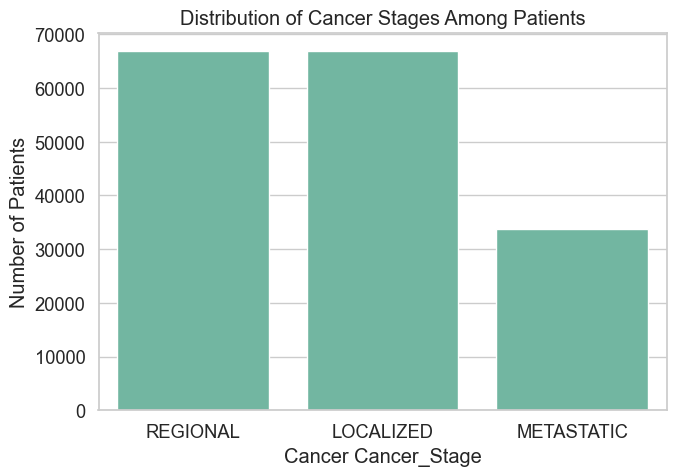

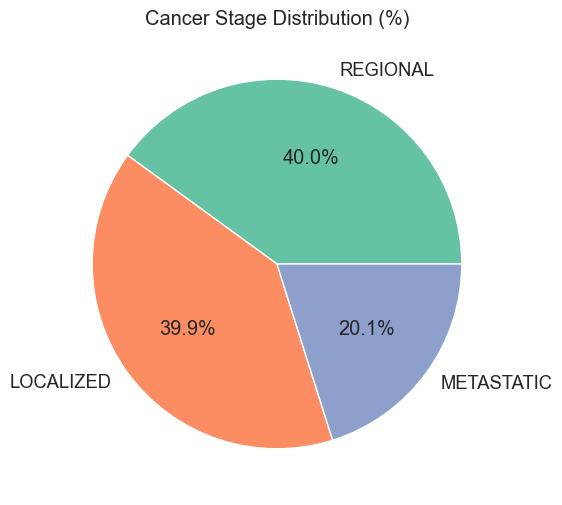

In [12]:
Cancer_Stage = "Cancer_Stage"

# Clean stage values
df[Cancer_Stage] = df[Cancer_Stage].astype(str).str.strip().str.upper()

# Summary table
stage_counts = df[Cancer_Stage].value_counts(dropna=False)
stage_pct = df[Cancer_Stage].value_counts(normalize=True, dropna=False) * 100

print("Cancer Cancer_Stage Distribution")
for s in stage_counts.index:
    print(f"{s}: {stage_counts[s]} patients ({stage_pct[s]:.1f}%)")

# Seaborn style settings
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Bar chart
plt.figure(figsize=(7,5))
sns.countplot(data=df, x=Cancer_Stage, order=stage_counts.index)
plt.title("Distribution of Cancer Stages Among Patients")
plt.xlabel("Cancer Cancer_Stage")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(stage_counts, labels=stage_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("Set2", n_colors=len(stage_counts)))
plt.title("Cancer Stage Distribution (%)")
plt.show()

The distribution of cancer stages in the dataset shows that most patients are either in the localized stage (39.9%) or the regional stage (40.0%), while a smaller proportion, 20.1%, are diagnosed at the metastatic stage. This indicates that the dataset captures a broad spectrum of disease progression, though advanced metastatic cases are less common. From a clinical perspective, survival chances are expected to decrease as stage advances, making stage a relevant feature to further explore in a predictive model.  

#### **3. How does survivability vary across cancer stages?**

Survivability (Proportion Survived 5 Years) by Stage ===
Cancer_Stage
LOCALIZED     60.0
METASTATIC    59.8
REGIONAL      60.0
Name: Survival_5_years, dtype: float64


/var/folders/l1/1lql6dz54539f6sygqlch68h0000gn/T/ipykernel_32979/4024830895.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


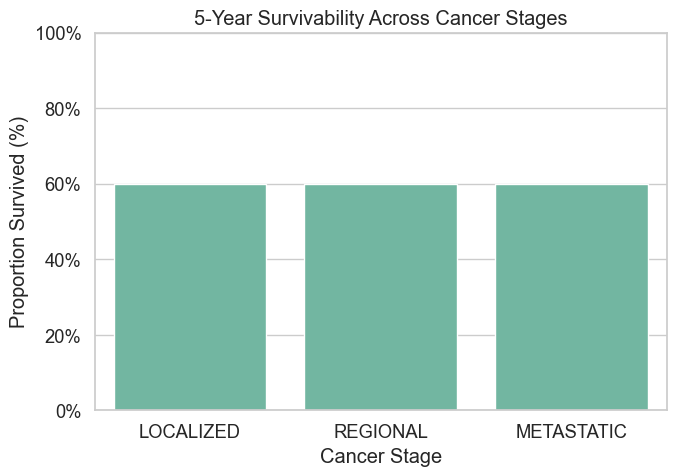

In [13]:
Cancer_Stage = "Cancer_Stage"
Survival_5_years = "Survival_5_years"

# Clean stage values
df[Cancer_Stage] = df[Cancer_Stage].astype(str).str.strip().str.upper()

# Convert survival to binary (1 = Yes, 0 = No)
df[Survival_5_years] = df[Survival_5_years].astype(str).str.strip().str.lower()
df[Survival_5_years] = df[Survival_5_years].map({"yes": 1, "no": 0})

# Drop missing values
df_clean = df.dropna(subset=[Cancer_Stage, Survival_5_years])

# Summary statistics
print("Survivability (Proportion Survived 5 Years) by Stage ===")
survival_rates = df_clean.groupby(Cancer_Stage)[Survival_5_years].mean().round(3) * 100
print(survival_rates)

# Seaborn style
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# Bar plot of survivability by stage
plt.figure(figsize=(7,5))
sns.barplot(data=df_clean, x=Cancer_Stage, y=Survival_5_years, estimator="mean", errorbar=None)
plt.title("5-Year Survivability Across Cancer Stages")
plt.xlabel("Cancer Stage")
plt.ylabel("Proportion Survived (%)")
plt.gca().set_ylim(0,1)  # scale to 0–100%
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.tight_layout()
plt.show()

In this synthetic dataset the survival rate across the different cancer stages is almost identical. This does not mirror the actual real world outcomes according to recent reserach and is probably an effect of the computer-generated data. Unfortunately this implies that cancer stage might not be a contributing feature to include in a predictive model.

#### **4. Among patients who did not survive past 5 years, how many had a history of smoking?**

Dtypes: {'Survival_5_years': dtype('int64'), 'Smoking_History': CategoricalDtype(categories=['No', 'Yes'], ordered=False, categories_dtype=object)}

Survival overall:
Survival_5_years
'1'    100387
'0'     67110
Name: count, dtype: int64

Smoking overall:
Smoking_History
'No'     100141
'Yes'     67356
Name: count, dtype: int64

Detected fatalities (Survival_5_years = No/0): 67110

Among patients who did not survive past 5 years (N=67110):
- Smokers: 26935 (40.1%)
- Non-smokers: 40175 (59.9%)


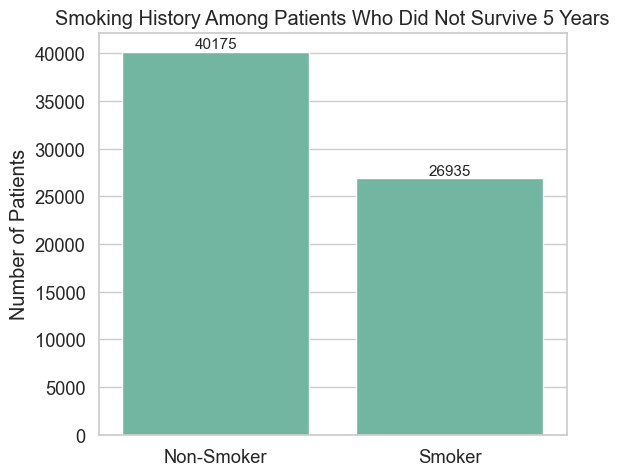

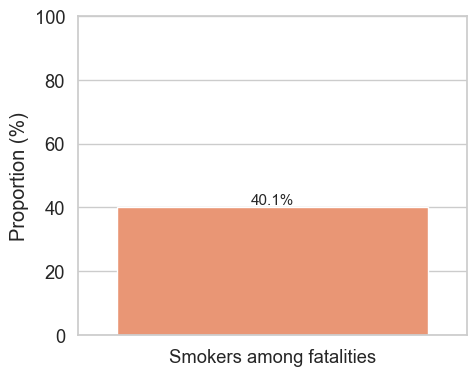

In [14]:
survival_col = "Survival_5_years"
smoking_col  = "Smoking_History"

# Diagnostics: see dtype and overall values
print("Dtypes:", dict(df[[survival_col, smoking_col]].dtypes))
print("\nSurvival overall:")
print(df[survival_col].astype(str).map(repr).value_counts().head(10))
print("\nSmoking overall:")
print(df[smoking_col].astype(str).map(repr).value_counts().head(10))

# fatalities mask that handles both numeric and string encodings
s_surv_str = df[survival_col].astype(str).str.strip().str.lower()
s_surv_num = pd.to_numeric(df[survival_col], errors="coerce")

# "No" encodings we accept as fatalities
fatal_is_no_str = s_surv_str.isin({"no", "0"})
fatal_is_zero   = s_surv_num.eq(0)

fatalities_mask = fatal_is_no_str | fatal_is_zero

total_fatal = int(fatalities_mask.sum())
print("\nDetected fatalities (Survival_5_years = No/0):", total_fatal)

if total_fatal == 0:
    print("No fatalities matched.")
else:
    # Normalize smoking to 0/1 for counting
    s_smok_str = df[smoking_col].astype(str).str.strip().str.lower()
    s_smok_num = pd.to_numeric(df[smoking_col], errors="coerce")

    smok_yes = s_smok_str.isin({"yes", "1", "true"})
    smok_one = s_smok_num.eq(1)

    smok_bin = np.where(smok_yes | smok_one, 1,
                        np.where(s_smok_str.isin({"no","0","false"}) | s_smok_num.eq(0), 0, np.nan))

    # Subset fatalities with valid smoking
    fatalities_idx = fatalities_mask & ~pd.isna(smok_bin)
    total_fatal_valid = int(fatalities_idx.sum())

    if total_fatal_valid == 0:
        print("Fatalities exist, but none have usable Smoking_History values.")
    else:
        count_smokers = int(smok_bin[fatalities_idx].sum())
        count_non     = total_fatal_valid - count_smokers
        prop_smokers  = (count_smokers / total_fatal_valid) * 100

        print(f"\nAmong patients who did not survive past 5 years (N={total_fatal_valid}):")
        print(f"- Smokers: {count_smokers} ({prop_smokers:.1f}%)")
        print(f"- Non-smokers: {count_non} ({100 - prop_smokers:.1f}%)")

        # Visuals (Seaborn professional style)
        sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

        # Counts bar
        plt.figure(figsize=(6,5))
        ax = sns.barplot(x=["Non-Smoker","Smoker"], y=[count_non, count_smokers], errorbar=None)
        ax.set_title("Smoking History Among Patients Who Did Not Survive 5 Years")
        ax.set_ylabel("Number of Patients")
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height())}",
                        (p.get_x()+p.get_width()/2, p.get_height()),
                        ha="center", va="bottom", fontsize=11)
        plt.tight_layout()
        plt.show()

        # Percentage bar
        plt.figure(figsize=(5,4))
        ax = sns.barplot(x=["Smokers among fatalities"], y=[prop_smokers], errorbar=None,
                         color=sns.color_palette("Set2")[1])
        ax.set_ylim(0,100)
        ax.set_ylabel("Proportion (%)")
        for p in ax.patches:
            ax.annotate(f"{p.get_height():.1f}%",
                        (p.get_x()+p.get_width()/2, p.get_height()),
                        ha="center", va="bottom", fontsize=11)
        plt.tight_layout()
        plt.show()

In [15]:
smoking_col = "Smoking_History"

# Convert to string and normalize
s_smok = df[smoking_col].astype(str).str.strip().str.lower()

# Map Yes/No → 1/0
smok_bin = s_smok.map({"yes": 1, "no": 0})

# Drop missing
valid = smok_bin.dropna()

# Counts & percentages
counts = valid.value_counts().rename({0: "Non-smoker", 1: "Smoker"})
percentages = (counts / counts.sum() * 100).round(1)

print("Overall smoking distribution:")
for group in counts.index:
    print(f"- {group}: {counts[group]} ({percentages[group]}%)")

Overall smoking distribution:
- Non-smoker: 100141 (59.8%)
- Smoker: 67356 (40.2%)


40% of patients who did not survive past 5 years aftger diagnosis had a history of smoking. But, it is important to consider that 60% of the entire dataset population were non smokers.

#### **5. How does the average tumor size vary across cancer stages?**

Average tumor size by cancer stage:


,Cancer_Stage,count,mean,median,std
0,LOCALIZED,66799,42.059552,42.0,21.697817
1,METASTATIC,33717,41.824451,42.0,21.686513
2,REGIONAL,66981,42.043251,42.0,21.639263


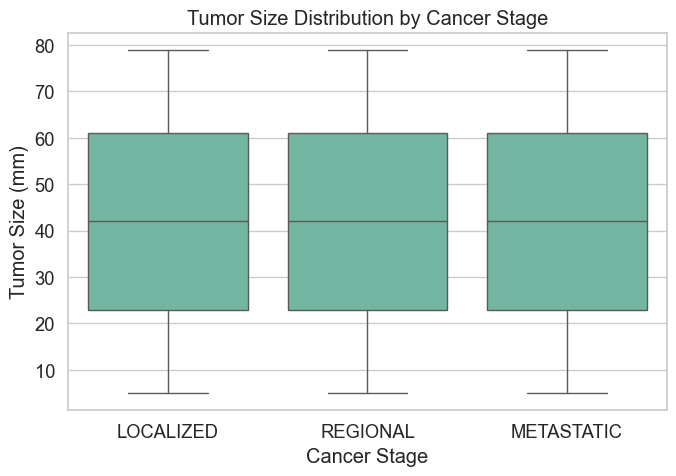

In [16]:
tumor_col = "Tumor_Size_mm"       # numeric
stage_col = "Cancer_Stage"     # categorical: localized, regional, metastatic

# Summary table
summary = (
    df.groupby(stage_col)[tumor_col]
      .agg(['count','mean','median','std'])
      .reset_index()
)
print("Average tumor size by cancer stage:")
display(summary)

# Complementary boxplot to show spread
plt.figure(figsize=(7,5))
sns.boxplot(
    data=df,
    x=stage_col, y=tumor_col
)
plt.title("Tumor Size Distribution by Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Tumor Size (mm)")
plt.tight_layout()
plt.show()

The average tumor size across the different cancer stages was as good as identical, again probably since this is a synthetic dataset.

#### **6. What proportion of patients had prior screening?**

Proportion of patients with prior screening (overall):
- Prior screening: 133965/167497 (80.0%)
- No prior screening: 33532/167497 (20.0%)

Screening_History distribution (counts and %):
                   count  percent
Screening_History                
REGULAR            67149     40.1
IRREGULAR          66816     39.9
NEVER              33532     20.0


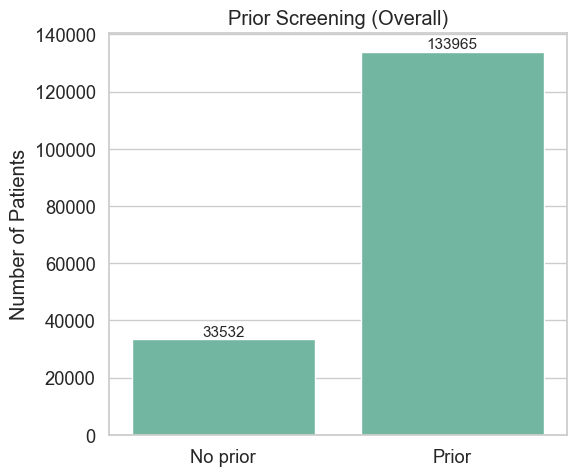

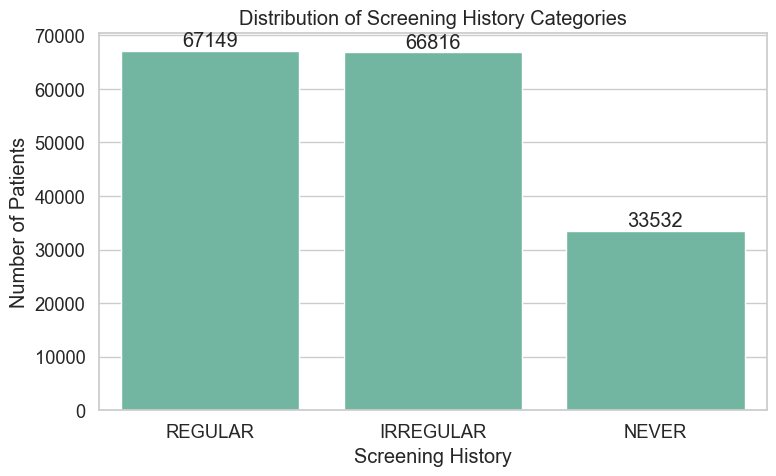

In [17]:
screening_col = "Screening_History"

s = df[screening_col].astype(str).str.strip().str.upper()

# Map to "prior screening" = 1 if screened at least once, 0 if never screened
# Handles common encodings:
#   Prior screening: YES / REGULAR / IRREGULAR / EVER / 1 / TRUE
#   No prior screening: NO / NEVER / 0 / FALSE
prior_yes = {"YES", "REGULAR", "IRREGULAR", "EVER", "SCREENED", "1", "TRUE"}
prior_no  = {"NO", "NEVER", "0", "FALSE"}

prior_bin = np.where(s.isin(prior_yes), 1, np.where(s.isin(prior_no), 0, np.nan))
prior_series = pd.Series(prior_bin, name="Prior_Screening")

# Drop missing after mapping
valid = ~pd.isna(prior_series)
df_screen = pd.DataFrame({
    "Prior_Screening": prior_series[valid].astype(int),
    screening_col: s[valid]
})

# Proportions (overall)
prop_prior = df_screen["Prior_Screening"].mean() * 100
count_prior = int(df_screen["Prior_Screening"].sum())
total = len(df_screen)
count_no = total - count_prior
prop_no = 100 - prop_prior

print("Proportion of patients with prior screening (overall):")
print(f"- Prior screening: {count_prior}/{total} ({prop_prior:.1f}%)")
print(f"- No prior screening: {count_no}/{total} ({prop_no:.1f}%)\n")

# Detailed distribution of raw Screening_History values (for transparency)
cat_counts = df_screen[screening_col].value_counts(dropna=False)
cat_pct = (cat_counts / cat_counts.sum() * 100).round(1)
print("Screening_History distribution (counts and %):")
print(pd.DataFrame({"count": cat_counts, "percent": cat_pct}))

# ===== Visualizations (Seaborn professional style) =====
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# 1) Bar chart: Prior vs No Prior (counts)
plt.figure(figsize=(6,5))
ax = sns.barplot(
    x=["No prior", "Prior"],
    y=[count_no, count_prior],
    errorbar=None
)
ax.set_title("Prior Screening (Overall)")
ax.set_ylabel("Number of Patients")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=11)
plt.tight_layout()
plt.show()

# 2) Bar chart: Distribution of Screening_History categories
plt.figure(figsize=(8,5))
order = cat_counts.index.tolist()
ax = sns.countplot(data=df_screen, x=screening_col, order=order)
ax.set_title("Distribution of Screening History Categories")
ax.set_xlabel("Screening History")
ax.set_ylabel("Number of Patients")
for c in ax.containers:
    ax.bar_label(c, fmt="%d")
plt.tight_layout()
plt.show()

Majority of patients had prior screening. Regular and irregular screenings were equally common.

#### 

#### **7. What is the frequency of the different treatment types?**

Frequency of Treatment Types:
- SURGERY: 66934 patients (40.0%)
- CHEMOTHERAPY: 50443 patients (30.1%)
- COMBINATION: 33276 patients (19.9%)
- RADIOTHERAPY: 16844 patients (10.1%)


/var/folders/l1/1lql6dz54539f6sygqlch68h0000gn/T/ipykernel_32979/239898926.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


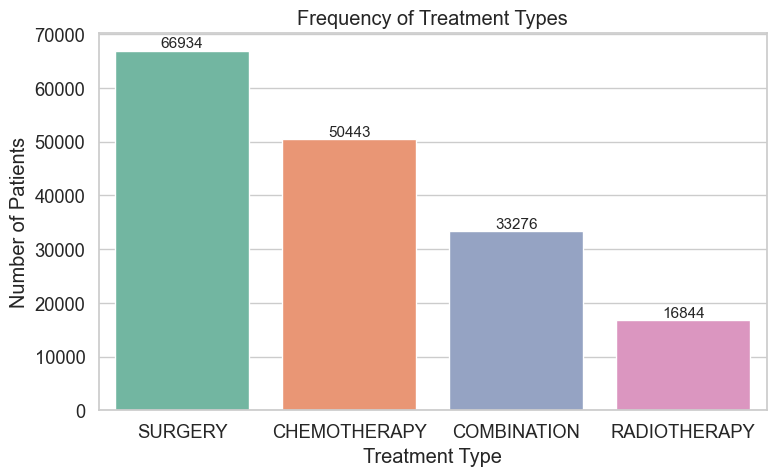

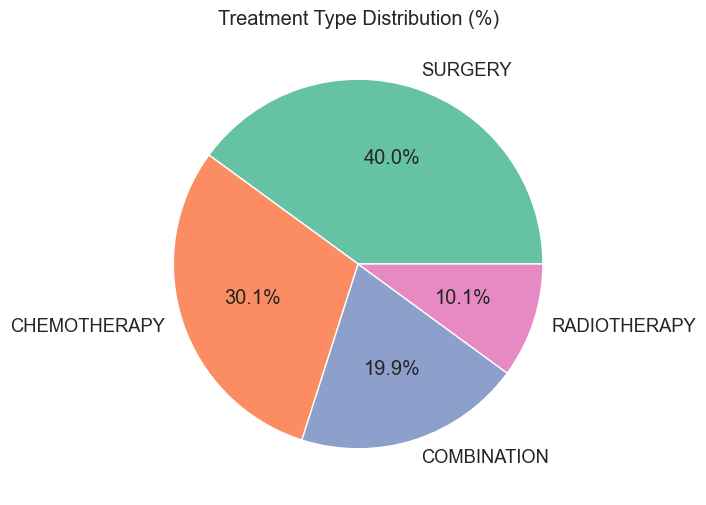

In [18]:
treat_col = "Treatment_Type"

# Clean values (remove whitespace, normalize case)
df[treat_col] = df[treat_col].astype(str).str.strip().str.upper()

# Frequency counts
treat_counts = df[treat_col].value_counts()
treat_pct = (treat_counts / treat_counts.sum() * 100).round(1)

print("Frequency of Treatment Types:")
for t, c in treat_counts.items():
    print(f"- {t}: {c} patients ({treat_pct[t]}%)")

# Visualization
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)

# 1) Bar chart (counts)
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x=treat_counts.index,
    y=treat_counts.values,
    palette="Set2"
)
ax.set_title("Frequency of Treatment Types")
ax.set_xlabel("Treatment Type")
ax.set_ylabel("Number of Patients")
for p, count in zip(ax.patches, treat_counts.values):
    ax.annotate(f"{count}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=11)
plt.tight_layout()
plt.show()

# 2) Pie chart (percentages)
plt.figure(figsize=(6,6))
plt.pie(
    treat_counts.values,
    labels=treat_counts.index,
    autopct="%1.1f%%",
    colors=sns.color_palette("Set2", n_colors=len(treat_counts))
)
plt.title("Treatment Type Distribution (%)")
plt.show()

Surgery was the most common treatment type, followed by, chemotherapy, combination treatment and lastly readiotherapy.

# Diagnostic Analytics


#### **1. What is the correlation between cancer stage, age, and survival prediction?**

                                 Age  Cancer_Stage_Encoded  \
Age                          1.00000                   NaN   
Cancer_Stage_Encoded             NaN                   NaN   
Survival_Prediction_Encoded -0.00194                   NaN   

                             Survival_Prediction_Encoded  
Age                                             -0.00194  
Cancer_Stage_Encoded                                 NaN  
Survival_Prediction_Encoded                      1.00000  


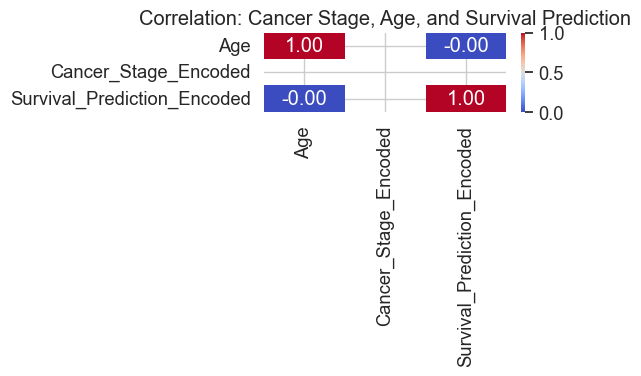

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Encode categorical variables
df['Cancer_Stage_Encoded'] = df['Cancer_Stage'].map({'Localized': 1, 'Regional': 2, 'Metastatic': 3})
df['Survival_Prediction_Encoded'] = df['Survival_Prediction'].map({'No': 0, 'Yes': 1})

# 2. Select relevant columns
corr_data = df[['Age', 'Cancer_Stage_Encoded', 'Survival_Prediction_Encoded']]

# 3. Compute Spearman correlation (better for ordinal data)
corr_matrix = corr_data.corr(method='spearman')
print(corr_matrix)

# 4. Plot correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation: Cancer Stage, Age, and Survival Prediction")
plt.tight_layout()
plt.show()

### Correlation Between Age, Cancer Stage, and Survival Prediction

We encoded:
- Cancer Stage: Localized=1, Regional=2, Metastatic=3
- Survival Prediction: No=0, Yes=1

Then we calculated Spearman correlation between Age, Cancer Stage, and Survival Prediction.

**Results:**
- Age vs. Survival Prediction: -0.0019
- Cancer Stage vs. Survival Prediction: -0.0020
- Age vs. Cancer Stage: -0.0039

All values are very close to **0**, suggesting **no meaningful monotonic correlation** between these variables.

This means:
- Neither age nor cancer stage alone shows a linear/monotonic association with survival prediction in this dataset.
- Survival is likely influenced by **other interacting factors** such as treatment type, tumor size, and early detection.

> Correlation gives only a limited view. To explore associations more meaningfully, we can complement this with Chi-square tests (for categorical links) or build predictive models (e.g., logistic regression, Cox regression).


#### **2. How strongly is the tumour stage associated with survival outcome?**

object
int64
Survival_5_years      0      1
Cancer_Stage                  
LOCALIZED         26731  40068
METASTATIC        13565  20152
REGIONAL          26814  40167
Chi-square Test Results:
Chi2 Statistic = 0.485, p-value = 0.78468, Degrees of freedom = 2
Cramer's V = 0.002 (0 = no association, 1 = perfect association)


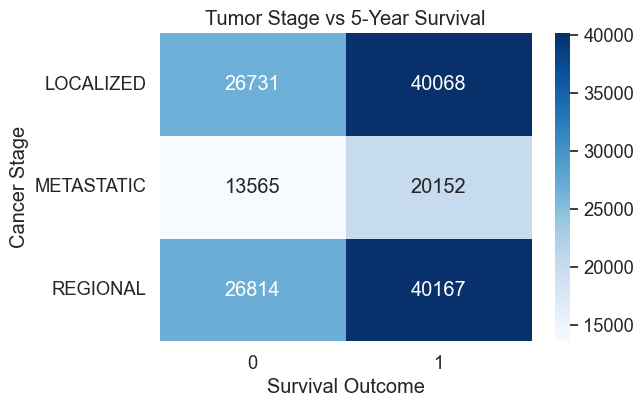

In [20]:
# 1. Check datatypes
print(df['Cancer_Stage'].dtype)
print(df['Survival_5_years'].dtype)

# 2. Crosstab between Cancer Stage and Survival
crosstab = pd.crosstab(df['Cancer_Stage'], df['Survival_5_years'])
print(crosstab)

# 3. Chi-square test of independence
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square Test Results:")
print(f"Chi2 Statistic = {chi2:.3f}, p-value = {p:.5f}, Degrees of freedom = {dof}")

# 4. Calculate Cramer's V (strength of association)
import numpy as np
n = crosstab.sum().sum()   # total samples
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape)-1)))
print(f"Cramer's V = {cramers_v:.3f} (0 = no association, 1 = perfect association)")

# 5. Visualize the crosstab as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("Tumor Stage vs 5-Year Survival")
plt.ylabel("Cancer Stage")
plt.xlabel("Survival Outcome")
plt.show()


### Tumor Stage vs 5-Year Survival – Association Analysis  

We analyzed the relationship between **tumor stage** and **5-year survival outcome** using a Chi-Square test of independence.  

#### Key Findings:
- **Chi-Square Statistic (χ²):** 0.485  
- **p-value:** 0.785 (>> 0.05)  
- **Cramer’s V:** 0.002  

#### Interpretation:
- The **p-value > 0.05** indicates that we **cannot reject the null hypothesis**.  
  - This means that **tumor stage and survival outcome are statistically independent** in this dataset.  
- The **Cramer’s V value of 0.002** suggests a **negligible association** between tumor stage and survival.  
  - Values close to 0 indicate no meaningful relationship, while values closer to 1 indicate stronger association.  

#### Heatmap Insights:
- Survival counts are high across **Localized** and **Regional** stages.  
- Even patients with **Metastatic** (Stage IV) cancer show similar survival counts, which is unusual compared to clinical expectations.  

#### Conclusion:
In real-world oncology, survival is typically much lower for metastatic patients.  
However, this dataset shows **no significant difference in survival by stage**, which may be due to:  
- **Synthetic data generation** or  
- **Dataset balancing methods** applied for modeling purposes.  

Hence, while the analysis shows **no strong statistical association**, caution is needed in interpreting these results clinically.  


#### **3.How are patients clustered with similar risk factors and survival outcomes?**

We take all major risk factors (demographics, tumor, lifestyle, comorbidities, screening, treatment). Numerics are standardized, categoricals are one-hot encoded.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

features = [
    'Age','Cancer_Stage','Tumor_Size_mm','Family_History','Smoking_History',
    'Alcohol_Consumption','Obesity_BMI','Diet_Risk','Physical_Activity',
    'Diabetes','Genetic_Mutation','Screening_History','Early_Detection','Treatment_Type'
]

X = df[features].copy()

# Split numeric vs categorical
num_cols = ['Age','Tumor_Size_mm']
cat_cols = [c for c in features if c not in num_cols]

# Preprocessing
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(drop='first'), cat_cols)
])


We apply KMeans (k=3) to group patients with similar risk profiles. Each patient is assigned a Cluster

In [22]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('prep', preprocess),
    ('kmeans', KMeans(n_clusters=3, random_state=42, n_init='auto'))
])
df['Cluster'] = pipe.fit_predict(X)

In [23]:
cluster_profile = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Tumor_Size_mm': 'mean',
    'Cancer_Stage': lambda x: x.value_counts().index[0],
    'Smoking_History': lambda x: x.value_counts().index[0],
    'Alcohol_Consumption': lambda x: x.value_counts().index[0],
    'Obesity_BMI': lambda x: x.value_counts().index[0],
    'Physical_Activity': lambda x: x.value_counts().index[0],
    'Diabetes': lambda x: x.value_counts().index[0],
    'Treatment_Type': lambda x: x.value_counts().index[0]
})
print(cluster_profile)

               Age  Tumor_Size_mm Cancer_Stage Smoking_History  \
Cluster                                                          
0        80.198176      55.907891     REGIONAL              No   
1        58.188178      55.681108     REGIONAL              No   
2        69.443676      19.307138     REGIONAL              No   

        Alcohol_Consumption Obesity_BMI Physical_Activity Diabetes  \
Cluster                                                              
0                       Yes  Overweight          Moderate       No   
1                        No  Overweight          Moderate       No   
2                        No  Overweight          Moderate       No   

        Treatment_Type  
Cluster                 
0              SURGERY  
1              SURGERY  
2              SURGERY  


### Interpreting Clusters (0, 1, 2)

The clusters (0, 1, and 2) were created using **K-Means clustering**. It is important to note that these cluster numbers are **arbitrary labels assigned by the algorithm**  they do not inherently carry medical meaning.  

Instead, the algorithm groups patients into clusters **based on mathematical similarity across features** (e.g., age, tumor size, BMI, lifestyle risks, treatment type). After clustering, we generated a **profile for each cluster** by summarizing the key attributes:

- **Mean values** (e.g., Age, Tumor Size)  
- **Most common categories** (e.g., Cancer Stage, Smoking History, Treatment Type)  

This allowed us to **interpret the groups in medical terms**:

-  **Cluster 0** - Older patients (80 years), larger tumors (56 mm), higher alcohol consumption, overweight BMI, mainly treated with surgery.  
- **Cluster 1** - Younger patients (58 years), similarly large tumors (56 mm), no alcohol consumption, overweight BMI, moderate physical activity, mostly treated with surgery.  
- **Cluster 2** - Mid-aged patients (69 years), smaller tumors (19 mm), no alcohol consumption, overweight BMI, moderate physical activity, mostly treated with surgery.  



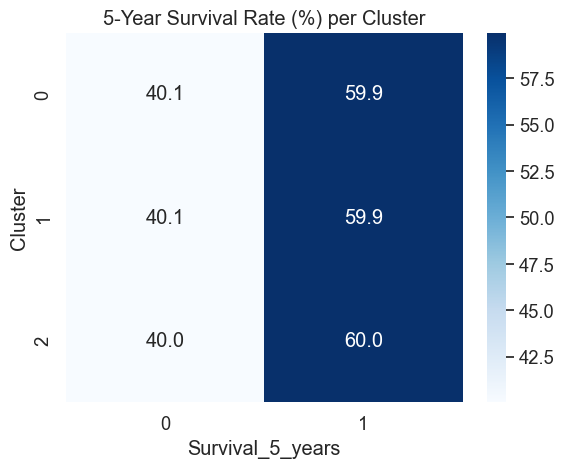

In [24]:
import seaborn as sns, matplotlib.pyplot as plt

tab = pd.crosstab(df['Cluster'], df['Survival_5_years'], normalize='index')*100
sns.heatmap(tab, annot=True, fmt=".1f", cmap="Blues")
plt.title("5-Year Survival Rate (%) per Cluster")
plt.show()

5-Year Survival Rate per Cluster
The heatmap shows the percentage of patients surviving 5 years across the three clusters generated by K-Means.

Cluster 0 → 59.9% of patients survived 5 years, while 40.1% did not.
Cluster 1 → 59.9% of patients survived 5 years, while 40.1% did not.
Cluster 2 → 60.0% of patients survived 5 years, while 40.0% did not.
Key Interpretation
Across all three clusters, the 5-year survival rate is very similar (~60%), with only marginal differences.
This suggests that while the clusters capture differences in risk factor profiles (age, tumor size, lifestyle, etc.), the overall survival outcome is nearly consistent across groups.
Therefore, clustering appears to reveal different patient profiles but does not strongly differentiate survival outcomes.


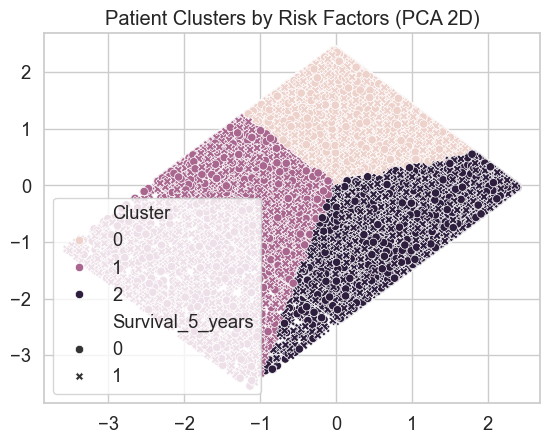

In [25]:
from sklearn.decomposition import PCA

X_trans = pipe.named_steps['prep'].transform(X)
pca = PCA(n_components=2).fit_transform(X_trans)

sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=df['Cluster'], style=df['Survival_5_years'])
plt.title("Patient Clusters by Risk Factors (PCA 2D)")
plt.show()

### PCA 2D Visualization of Patient Clusters
To evaluate whether risk factors naturally separate patients into distinct subgroups, we applied PCA to reduce the dimensionality of risk-factor data into 2 components. Patients were then plotted based on their assigned clusters and survival outcome.

The PCA 2D plot shows **significant overlap between clusters**, indicating that the selected risk factors do not strongly separate patients into distinct groups. While this visualization does not provide clear clinical meaning, it is an important **diagnostic step** to assess clustering validity. 

This finding suggests that survival outcomes in colorectal cancer are influenced by **complex, overlapping risk factors**, and simple clustering based only on basic clinical variables is insufficient. In the dashboard, we therefore rely on clearer visuals (e.g., heatmaps, bar charts) for communicating survival patterns.


#### **4. Is there a correlation between Age and 5-year survival?**

In [26]:
from scipy.stats import pointbiserialr

# Coerce Age to numeric
age = pd.to_numeric(df["Age"], errors="coerce")

# Coerce Survival_5_years to 0/1
# Try numeric first; otherwise map common text labels
y_try = pd.to_numeric(df["Survival_5_years"], errors="coerce")
if y_try.notna().mean() > 0.8:
    y = (y_try > 0).astype(float)
else:
    y_raw = df["Survival_5_years"].astype(str).str.strip().str.lower()
    yes = {"1","yes","true","alive","survived","y","t"}
    no  = {"0","no","false","dead","died","n","f"}
    y = y_raw.map(lambda v: 1.0 if v in yes else (0.0 if v in no else np.nan))

data = pd.DataFrame({"Age": age, "Survival_5_years": y}).dropna()
assert len(data) > 1, "Not enough complete cases after cleaning."

# Point-biserial correlation (equivalent to Pearson with 0/1 outcome)
r_pb, p_pb = pointbiserialr(data["Survival_5_years"], data["Age"])
print(f"Point-biserial r: {r_pb:.4f}  p-value: {p_pb:.3g}")

Point-biserial r: -0.0017  p-value: 0.498


Point-biseral (identical to pearson) was used as one variable was continous and the other binary.

**Results:**
There is no evidence of a linear association between Age and 5-year survival.
- Effect size: r = −0.0017 practically negligible.
- Significance: p = 0.498 not statistically significant at α = 0.05.
- Older vs. younger patients have virtually identical 5-year survival rates on average.

#### **5. Is there a correlation between having a history of smoking and survival 5 or more years after diagnosis?**

In [27]:
from scipy.stats import chi2_contingency, fisher_exact

# Normalize to 0/1
def to_binary(series):
    s = series.astype(str).str.strip().str.lower()
    mapping = {"yes": 1, "no": 0, "1": 1, "0": 0, "true": 1, "false": 0}
    return s.map(mapping)

assert "Smoking_History" in df.columns and "Survival_5_years" in df.columns, "Required columns not found."

smk = to_binary(df["Smoking_History"])
surv = to_binary(df["Survival_5_years"])

data = pd.DataFrame({"Smoke": smk, "Surv": surv}).dropna()
assert set(data["Smoke"].unique()) <= {0,1} and set(data["Surv"].unique()) <= {0,1}, \
    "Values must be strictly Yes/No (or 0/1) after mapping."

# 2x2 contingency table
ct = pd.crosstab(data["Smoke"], data["Surv"])  # rows: Smoke (0/1), cols: Surv (0/1)
# Ensure both dimensions present
for col in [0,1]:
    if col not in ct.columns:
        ct[col] = 0
for idx in [0,1]:
    if idx not in ct.index:
        ct.loc[idx] = [0,0]
ct = ct.sort_index().sort_index(axis=1)

# Chi-square and Phi coefficient
chi2, p_chi2, dof, exp = chi2_contingency(ct, correction=False)
n = ct.values.sum()
phi = np.sqrt(chi2 / n) * (1 if ((ct.loc[1,1]*ct.loc[0,0]) >= (ct.loc[1,0]*ct.loc[0,1])) else -1)  # sign aligned with correlation

# Fisher's exact test (odds ratio + p-value) 
# Table must be [[a,b],[c,d]] with rows Smoke=0/1, cols Surv=0/1
a, b = int(ct.loc[0,0]), int(ct.loc[0,1])
c, d = int(ct.loc[1,0]), int(ct.loc[1,1])
odds_ratio, p_fisher = fisher_exact([[a,b],[c,d]], alternative="two-sided")

print("Contingency table (Smoke x Survival):\n", ct, "\n")
print(f"n = {n}")
print(f"Chi-square: chi2 = {chi2:.4f}, df = {dof}, p = {p_chi2:.3g}")
print(f"Phi coefficient (binary-binary correlation): {phi:.4f}")
print(f"Fisher's exact test: odds ratio = {odds_ratio:.3f}, p = {p_fisher:.3g}")

Contingency table (Smoke x Survival):
 Surv       0      1
Smoke              
0      40175  59966
1      26935  40421 

n = 167497
Chi-square: chi2 = 0.2809, df = 1, p = 0.596
Phi coefficient (binary-binary correlation): 0.0013
Fisher's exact test: odds ratio = 1.005, p = 0.597


**Results:**
There is no meaningful association between smoking history and 5-year survival.
- Significance:(1)=0.2809, p=0.596; Fisher p=0.597 not statistically significant.
- Effect size: Phi = 0.0013  essentially zero correlation for two binaries.
- Odds ratio: 1.005 survival odds are basically identical for smokers vs non-smokers.

## Predictive Analysis 

**Given a patient’s demographic, lifestyle, and clinical features, can we predict whether they will survive at least 5 years after colorectal cancer diagnosis?**

### Feature Selection

##### 1. Target Variable
 The feature **"Survival_5_years"** was chosen as the target variable. Since it is already a binary feature (Yes/No), it is ready for usage.

##### 2. Input Variables
Based on the difficulties of finding meaningful relationships/correlations in the descriptive and diagnostic analysis, we decided that using the "Filter Method" for feature selection was not suitable. Instead, we tried implemented different "Wrapper methods" to evaluate feature importance with ML algorithms. The cons with this is that it is very computationally expensive. We implemented a Wrapper metod using RFECV + Logistic Regression and  SFS (forward) + RandomForest.

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin


# Target & features
assert "Survival_5_years" in df.columns, "Target 'Survival_5_years' not found."
y = (
    df["Survival_5_years"].astype(str).str.strip().str.lower()
      .map({"yes": 1, "no": 0, "1": 1, "0": 0})
)
assert y.notna().all(), "Target has unmapped values; ensure only Yes/No (or 1/0)."

# Drop columns not suitable as input (leakage removal)
cols = df.columns
drop_cols = [c for c in ["Patient_ID", "Survival_5_years", "Mortality"] if c in cols]
drop_cols += [c for c in cols if "survival_prediction" in c.lower()]
drop_cols += [c for c in cols if c.endswith("_Encoded")]
X = df.drop(columns=drop_cols)

# Preprocessing pipeline
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

def make_ohe(categories=None):
    try:
        kwargs = dict(handle_unknown="ignore", sparse_output=False, dtype=np.float32)
    except TypeError:
        kwargs = dict(handle_unknown="ignore", sparse=False, dtype=np.float32)
    if categories is not None:
        kwargs["categories"] = categories
    return OneHotEncoder(**kwargs)

def make_preprocessor(categories=None):
    return ColumnTransformer(
        transformers=[
            ("num", Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="median")),
                ("scaler", StandardScaler(with_mean=True, with_std=True))
            ]), num_cols),
            ("cat", Pipeline(steps=[
                ("imputer", SimpleImputer(strategy="most_frequent")),
                ("ohe", make_ohe(categories))
            ]), cat_cols),
        ],
        remainder="drop",
        verbose_feature_names_out=False
    )

# Learn OHE categories ONCE to lock column order
preprocess_tmp = make_preprocessor()    # categories='auto'
preprocess_tmp.fit(X)
ohe_categories = preprocess_tmp.named_transformers_["cat"].named_steps["ohe"].categories_

def fresh_preprocessor():
    return make_preprocessor(categories=ohe_categories)

# CV
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# 1. RFECV + Logistic Regression (wrapper)
base_lr = LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear")

rfecv = RFECV(
    estimator=base_lr,
    step=5,
    cv=cv,
    scoring="roc_auc",
    n_jobs=-1,
    min_features_to_select=5
)

pipe_rfecv = Pipeline(steps=[
    ("preprocess", fresh_preprocessor()),  # fresh, unfitted
    ("select", rfecv),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear"))
])

print("Fitting RFECV + LogisticRegression ...")
pipe_rfecv.fit(X, y)
cv_scores_rfecv = cross_val_score(pipe_rfecv, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)

feat_names_transformed = pipe_rfecv.named_steps["preprocess"].get_feature_names_out()
support_mask = pipe_rfecv.named_steps["select"].support_
selected_features_rfecv = feat_names_transformed[support_mask]

print("\nRFECV + LogisticRegression:")
print(f"Selected features: {support_mask.sum()} of {len(feat_names_transformed)}")
print(f"CV ROC-AUC (mean ± std): {cv_scores_rfecv.mean():.4f} ± {cv_scores_rfecv.std():.4f}")
print("Sample selected features:", pd.Series(selected_features_rfecv).head(20).to_list())

# 2. SFS (forward) + RandomForest (FAST variant)
# -----------------------------
sub_size = min(30000, len(X))
X_sub, _, y_sub, _ = train_test_split(X, y, train_size=sub_size, stratify=y, random_state=42)

# Build search space on subset
preprocess_for_sfs = fresh_preprocessor()
Xsub_trans = preprocess_for_sfs.fit_transform(X_sub)
feat_names_sub = preprocess_for_sfs.get_feature_names_out()

rf_fast = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

p_trans_sub = Xsub_trans.shape[1]
n_features_to_select = min(12, max(8, int(0.3 * p_trans_sub)))
print(f"\nTransformed (subsample) features: {p_trans_sub}, selecting {n_features_to_select} via SFS")

sfs = SequentialFeatureSelector(
    rf_fast,
    n_features_to_select=n_features_to_select,
    direction="forward",
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)

print("Fitting SFS (forward) + RandomForest on subsample ...")
sfs.fit(Xsub_trans, y_sub)
sel_mask = sfs.get_support()
sel_names = feat_names_sub[sel_mask]
print("Selected by SFS (names):", list(sel_names))

# Map selected names to indices in FULL transformed space
preprocess_for_names = fresh_preprocessor()
preprocess_for_names.fit(X)
feat_names_full = preprocess_for_names.get_feature_names_out()
name_to_index_full = {name: i for i, name in enumerate(feat_names_full)}
sel_indices_full = np.array([name_to_index_full[n] for n in sel_names], dtype=int)

# clone-safe column selector for sciki-learn pipelines
class ColumnSelectorByIndex(BaseEstimator, TransformerMixin):
    """Select columns by integer indices after preprocessing (clone-safe)."""
    def __init__(self, indices=()):
        # store immutable tuple so cloning sees an unchanged param
        self.indices = tuple(indices)
    def fit(self, X, y=None):
        # keep a separate internal numpy array for slicing
        self._indices_arr = np.asarray(self.indices, dtype=int)
        return self
    def transform(self, X):
        X_arr = X if isinstance(X, np.ndarray) else np.asarray(X)
        return X_arr[:, self._indices_arr]

rf_final = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1
)

final_sfs_pipe = Pipeline([
    ("pre", fresh_preprocessor()),                     # fresh, unfitted
    ("sel", ColumnSelectorByIndex(sel_indices_full)),  # clone-safe selector
    ("clf", rf_final)
])

cv_scores_sfs = cross_val_score(final_sfs_pipe, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
print("\nSequential Forward Selection + RandomForest:")
print(f"Selected features: {len(sel_indices_full)} of {len(feat_names_full)}")
print(f"CV ROC-AUC (mean ± std): {cv_scores_sfs.mean():.4f} ± {cv_scores_sfs.std():.4f}")

# Hold-out evaluation examples
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# RFECV pipeline
pipe_rfecv.fit(X_train, y_train)
y_pred_proba = pipe_rfecv.predict_proba(X_test)[:, 1]
print("\nHold-out ROC-AUC (RFECV):", roc_auc_score(y_test, y_pred_proba))

# SFS pipeline 
final_sfs_pipe.fit(X_train, y_train)
y_pred_proba = final_sfs_pipe.predict_proba(X_test)[:, 1]
print("Hold-out ROC-AUC (SFS):", roc_auc_score(y_test, y_pred_proba))


Fitting RFECV + LogisticRegression ...

=== RFECV + LogisticRegression ===
Selected features: 5 of 40
CV ROC-AUC (mean ± std): 0.4977 ± 0.0018
Sample selected features: ['Family_History_No', 'Alcohol_Consumption_Yes', 'Obesity_BMI_Overweight', 'Diet_Risk_Moderate', 'Screening_History_Never']

Transformed (subsample) features: 40 → selecting 12 via SFS
Fitting SFS (forward) + RandomForest on subsample ...
Selected by SFS (names): ['Age', 'Mortality_Rate_per_100K', 'Cluster', 'Alcohol_Consumption_Yes', 'Diet_Risk_Low', 'Diet_Risk_Moderate', 'Diabetes_No', 'Diabetes_Yes', 'Inflammatory_Bowel_Disease_No', 'Inflammatory_Bowel_Disease_Yes', 'Screening_History_Never', 'Treatment_Type_RADIOTHERAPY']

=== Sequential Forward Selection + RandomForest (FAST) ===
Selected features: 12 of 40
CV ROC-AUC (mean ± std): 0.5019 ± 0.0018

Hold-out ROC-AUC (RFECV): 0.49695214145387306
Hold-out ROC-AUC (SFS FAST): 0.5000872138816566


**Output from running the Wrapper method cell (so we dont have to run it again):**

Fitting RFECV + LogisticRegression ...

RFECV + LogisticRegression:
- Selected features: 5 of 40
- CV ROC-AUC (mean ± std): 0.4977 ± 0.0018
- Sample selected features: ['Family_History_No', 'Alcohol_Consumption_Yes', 'Obesity_BMI_Overweight', 'Diet_Risk_Moderate', 'Screening_History_Never']

Transformed (subsample) features: 40, selecting 12 via SFS
Fitting SFS (forward) + RandomForest on subsample ...
- Selected by SFS (names): ['Age', 'Mortality_Rate_per_100K', 'Cluster', 'Alcohol_Consumption_Yes', 'Diet_Risk_Low', 'Diet_Risk_Moderate', 'Diabetes_No', 'Diabetes_Yes', 'Inflammatory_Bowel_Disease_No', 'Inflammatory_Bowel_Disease_Yes', 'Screening_History_Never', 'Treatment_Type_RADIOTHERAPY']

Sequential Forward Selection + RandomForest:
Selected features: 12 of 40
CV ROC-AUC (mean ± std): 0.5019 ± 0.0018

Hold-out ROC-AUC (RFECV): 0.49695214145387306
Hold-out ROC-AUC (SFS): 0.5000872138816566

**Interpretation:**
Using wrapper-based selection (RFECV + Logistic Regression and Sequential Forward Selection + Random Forest) on the cleaned feature set (that is, we implemented leakage removal) consistently produced chance-level performance. Cross-validated ROC-AUC score was around 0.50, leaving our feature importance as good as a random guess. Earlier EDA likewise showed no detectable association between predictors and the target Survival_5_years across multiple tests despite a large sample (n = 167497). Together, these results indicate the dataset behaves like a null synthetic dataset in which the 5-year survival label is effectively independent of the provided features. The dataset remains useful in the aspect of academic learning/training, but high predictive accuracy should not be expected given the apparent independence. 

##### Selected Input Features:
As the features in our dataset are indipendant and our predictive model is expected to have low predictive performance - the features we have chosen to include are based on the features the Wrapper method suggested (although random) that also align with what real-world research has reported being factors causing mortality in colorectal cancer. Selected features are:
- Age
- Obesity_BMI
- Family_History
- Alcohol_Consumption
- Diet_Risk
- Screening_History

##### 3. Feature Engineering of Input features (Ordina encoding, One-hot encoding)

- Ordinal encoding: **Obesity_BMI**, **Diet_Risk** and **Screening_History**
- One-hot encoding (and using drop-if-binary): **Family_History** and **Alcohol_Comsumption**
- **Age** is kept numeric

In [37]:
feature_cols = ["Age", "Obesity_BMI", "Family_History", "Alcohol_Consumption", "Diet_Risk", "Screening_History"]
missing = [c for c in feature_cols if c not in df.columns]
assert not missing, f"Missing expected columns: {missing}"

X = df[feature_cols].copy()

# Normalize capitalization for categorical text so it matches encoder category lists
for c in ["Obesity_BMI", "Family_History", "Alcohol_Consumption", "Diet_Risk", "Screening_History"]:
    X[c] = X[c].astype(str).str.strip().str.capitalize()

# Ordinal-encoded columns and their order
ord_cols = ["Obesity_BMI", "Diet_Risk", "Screening_History"]
ord_categories = [
    ["Normal", "Overweight", "Obese"],     # Obesity_BMI order
    ["Low", "Moderate", "High"],           # Diet_Risk order
    ["Never", "Irregular", "Regular"],     # Screening_History order
]

# Binary categoricals (one-hot with drop='if_binary' -> single 0/1 column)
bin_cat_cols = ["Family_History", "Alcohol_Consumption"]

# Numeric columns
num_cols = ["Age"]

# Version-robust OHE 
def make_ohe():
    try:
        return OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse_output=False, dtype=np.float32)
    except TypeError:
        return OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse=False, dtype=np.float32)

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler(with_mean=True, with_std=True)),
        ]), num_cols),
        ("ord", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("enc", OrdinalEncoder(categories=ord_categories, dtype=np.float32)),
        ]), ord_cols),
        ("bin", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", make_ohe()),  # one-hot with drop-if-binary (aka dummy coding for binaries)
        ]), bin_cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False,
)

# Fit/transform fully numeric array
X_num = preprocess.fit_transform(X)               # NumPy array
feature_names = preprocess.get_feature_names_out()
X_num_df = pd.DataFrame(X_num, columns=feature_names)

# Prove all dtypes are numeric
all_numeric = all(np.issubdtype(dt, np.number) for dt in X_num_df.dtypes)
print("All dtypes numeric:", all_numeric)         # expect: True
print("Sample dtypes:\n", X_num_df.dtypes.head(10))
print("Shape:", X_num_df.shape)

All dtypes numeric: True
Sample dtypes:
 Age                        float64
Obesity_BMI                float64
Diet_Risk                  float64
Screening_History          float64
Family_History_Yes         float64
Alcohol_Consumption_Yes    float64
dtype: object
Shape: (167497, 6)


**Building a encoded dataframe with the input features and target variable**

In [44]:
# 1 Make/confirm numeric target (0/1)
y_num = (
    df["Survival_5_years"].astype(str).str.strip().str.lower()
      .map({"yes": 1, "no": 0, "1": 1, "0": 0})
      .astype("int64")
)

# 2 Create encoded feature DataFrame from transformed array
df_features_encoded = pd.DataFrame(
    X_num, 
    columns=feature_names, 
    index=df.index  # keep original row alignment
)

# 3 Combine features + target into one modeling DataFrame
df_model_encoded = pd.concat([df_features_encoded, y_num.rename("Survival_5_years")], axis=1)

# 4 Prove everything is numeric
all_numeric = all(np.issubdtype(dt, np.number) for dt in df_model_encoded.dtypes)
print("All dtypes numeric (features + target):", all_numeric)
print(df_model_encoded.dtypes.tail(10))
print("Shape:", df_model_encoded.shape)
df_model_encoded.head(6)

All dtypes numeric (features + target): True
Age                        float64
Obesity_BMI                float64
Diet_Risk                  float64
Screening_History          float64
Family_History_Yes         float64
Alcohol_Consumption_Yes    float64
Survival_5_years             int64
dtype: object
Shape: (167497, 7)


,Age,Obesity_BMI,Diet_Risk,Screening_History,Family_History_Yes,Alcohol_Consumption_Yes,Survival_5_years
0,0.656918,1.0,0.0,2.0,0.0,1.0,1
1,-0.859199,1.0,1.0,2.0,0.0,0.0,1
2,-0.269598,0.0,0.0,1.0,0.0,0.0,1
3,1.162291,2.0,2.0,2.0,0.0,0.0,1
4,-0.269598,0.0,0.0,0.0,0.0,0.0,1
5,-0.016911,2.0,1.0,2.0,0.0,1.0,0


##### **4. Checking for class imbalance in the target class**

Coding: 0 = No (did not survive 5 years), 1 = Yes (survived 5 years)


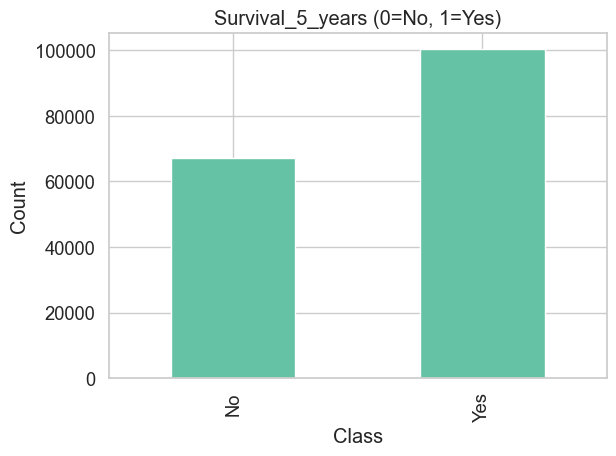

In [49]:
y = (df["Survival_5_years"].astype(str).str.strip().str.lower()
       .map({"no":0, "yes":1, "0":0, "1":1}).astype("int8"))
print("Coding: 0 = No (did not survive 5 years), 1 = Yes (survived 5 years)")

# Histogram (labeled with Yes/No for readability)
y.replace({0:"No", 1:"Yes"}).value_counts().sort_index().plot(kind="bar")
plt.title("Survival_5_years (0=No, 1=Yes)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

- There is a slight class imbalance which might influence developed machine learning models in favoring the majority class, this will be taken into consideration when evaluating model performance.

##### **5. Separating into features X and target variable y**

In [50]:
X = df[["Age", "Obesity_BMI", "Family_History", "Alcohol_Consumption", "Diet_Risk", "Screening_History"]].copy()

y = (df["Survival_5_years"].astype(str).str.strip().str.lower()
       .map({"no": 0, "yes": 1, "0": 0, "1": 1})
       .astype("int8"))

print("X shape:", X.shape)
print("y shape:", y.shape, "| classes:", y.unique())

X shape: (167497, 6)
y shape: (167497,) | classes: [1 0]


**Applying stratified partitioning to maintain distributin within classes**

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

##### **6. Model developing and evaluation**

- Initially, two differnt SVM models were included in the evaluation (one linear and one rbf kernel) but as these models performed as the bottom two but by far requiring the longest training time, these were excluded and replaced with two Logistic Regression models.

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

MODELS_TO_TEST = {
    # Decision Tree
    "DT_depth3": DecisionTreeClassifier(max_depth=3, random_state=42),
    "DT_depth5": DecisionTreeClassifier(max_depth=5, random_state=42),

    # Random Forest
    "RF_100_md5": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1),
    "RF_300_mdNone": RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1),

    # KNN (scale features)
    "KNN_k3": Pipeline([
        ("scaler", MinMaxScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=3))
    ]),
    "KNN_k7": Pipeline([
        ("scaler", MinMaxScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=7))
    ]),

    # Logistic Regression (linear classifier; scale features)
    "LR_L2_C1": Pipeline([
        ("scaler", MinMaxScaler()),
        ("clf", LogisticRegression(penalty="l2", C=1.0, solver="liblinear", max_iter=2000))
    ]),
    "LR_L1_C0.5": Pipeline([
        ("scaler", MinMaxScaler()),
        ("clf", LogisticRegression(penalty="l1", C=0.5, solver="liblinear", max_iter=2000))
    ]),

    # Gradient Boosting
    "GB_100_lr0.1": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "GB_300_lr0.05": GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42),
}

**Note** - in the evaluation of models below we chose to evaluate the models on a subset of the data set (50k) instead of the whole dataset (~170k) in order to decrease the training time and computational expense. 50k is still a large sample and cosidered enough for evaluation. Additionally, the final model will be trained on the full dataset.

In [69]:
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

NUMBER_OF_SPLITS = 10
SCORING_METRICS = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]
SUBSAMPLE = 50_000  # set to None to use the full X_train

# Results table
results_evaluation = pd.DataFrame({
    "classifier_name": [],
    "fit_time": [],
    "score_time": [],
    "test_accuracy": [],
    "test_precision_macro": [],
    "test_recall_macro": [],
    "test_f1_macro": [],
})

# Wrap every classifier with your preprocessing
WRAPPED_MODELS = {
    name: (Pipeline([("prep", preprocess), *est.steps]) if isinstance(est, Pipeline)
           else Pipeline([("prep", preprocess), ("clf", est)]))
    for name, est in MODELS_TO_TEST.items()
}

# Stratified subsample for faster CV, keeps class balance
if SUBSAMPLE is not None and len(X_train) > SUBSAMPLE:
    X_cv, _, y_cv, _ = train_test_split(
        X_train, y_train, train_size=SUBSAMPLE, stratify=y_train, random_state=42
    )
else:
    X_cv, y_cv = X_train, y_train

cv = StratifiedKFold(n_splits=NUMBER_OF_SPLITS, shuffle=True, random_state=42)

# iteration
for name, classifier in WRAPPED_MODELS.items():
    print(f"Currently training the classifier {name} on {len(X_cv):,} rows.")

    scores_cv = cross_validate(
        estimator=classifier,
        X=X_cv, y=y_cv,
        cv=cv,
        scoring=SCORING_METRICS,
        n_jobs=-1,
        return_train_score=False
    )

    dict_this_result = {"classifier_name": [name]}
    for metric_name, score_per_fold in scores_cv.items():
        dict_this_result[metric_name] = [score_per_fold.mean()]

    this_result = pd.DataFrame(dict_this_result)
    results_evaluation = pd.concat([results_evaluation, this_result], ignore_index=True)

print("The experimental setup has finished")

# sort by your main metric
results_evaluation = results_evaluation.sort_values("test_f1_macro", ascending=False).reset_index(drop=True)
results_evaluation

Currently training the classifier DT_depth3 on 50,000 rows.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Currently training the classifier DT_depth5 on 50,000 rows.
Currently training the classifier RF_100_md5 on 50,000 rows.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Currently training the classifier RF_300_mdNone on 50,000 rows.
Currently training the classifier KNN_k3 on 50,000 rows.
Currently training the classifier KNN_k7 on 50,000 rows.
Currently training the classifier LR_L2_C1 on 50,000 rows.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Currently training the classifier LR_L1_C0.5 on 50,000 rows.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Currently training the classifier GB_100_lr0.1 on 50,000 rows.
Currently training the classifier GB_300_lr0.05 on 50,000 rows.
The experimental setup has finished


,classifier_name,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,KNN_k3,0.419028,1.147058,0.52502,0.497399,0.497469,0.496590
1,KNN_k7,0.454176,1.466455,0.53584,0.493489,0.494393,0.487490
2,RF_300_mdNone,17.895873,0.704620,0.55172,0.497296,0.497977,0.480819
3,DT_depth5,0.709766,0.117456,0.59898,0.526722,0.500039,0.376503
4,GB_300_lr0.05,11.405089,0.084654,0.59874,0.495041,0.499822,0.376320
5,GB_100_lr0.1,6.536335,0.122204,0.59894,0.525213,0.499964,0.376260
6,RF_100_md5,3.556861,0.149001,0.59934,0.358011,0.500033,0.374929
7,DT_depth3,0.379335,0.065321,0.59934,0.324674,0.500017,0.374835
8,LR_L1_C0.5,0.809253,0.118463,0.59934,0.299670,0.500000,0.374742
9,LR_L2_C1,0.539219,0.117107,0.59934,0.299670,0.500000,0.374742


**Interpretation of results** 
Across the 10 models we compared, macro-averaged F1 is the most appropriate single metric because the target is class-imbalanced. By macro-F1, KNN_k3 is the top performer (F1≈0.497), narrowly ahead of KNN_k7 (≈0.487). Several tree/ensemble models show higher accuracy (≈0.599), but their macro-F1 collapses to ~0.375, indicating they largely favor the majority class and do not balance precision/recall across classes. In contrast, KNN_k3 delivers the best class-balanced performance among all candidates while remaining fast to train (with the expected slower prediction time typical of KNN). That said, all scores are close to chance, reinforcing our earlier finding that the dataset contains little learnable signal for 5-year survival. Given the imbalance and our metric choice, ***KNN_k3 is the most suitable model to carry forward,** and subsequent evaluation should report both macro-F1 and class-wise metrics alongside accuracy to avoid majority-class bias.

**Best model = KNN_k3**

##### **7. Calculating the KNN-k3´s performance on the test set put aside**

In [83]:
from sklearn.metrics import classification_report

final_model = Pipeline([
    ("prep", preprocess),            # <- use the same preprocess you built earlier
    ("scaler", MinMaxScaler()),      # scale final numeric features for KNN
    ("clf", KNeighborsClassifier(n_neighbors=3))
])

# Train the model on the training data 
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = final_model.predict(X_test)

print("Final performance on the test set:\n")
print(classification_report(y_test, y_test_pred, target_names=["No (0) — did not survive 5y", "Yes (1) — survived 5y"]))

Final performance on the test set:

                             precision    recall  f1-score   support

No (0) — did not survive 5y       0.40      0.34      0.37     13422
      Yes (1) — survived 5y       0.60      0.65      0.62     20078

                   accuracy                           0.53     33500
                  macro avg       0.50      0.50      0.50     33500
               weighted avg       0.52      0.53      0.52     33500



**Interpretation**
The KNN_k3 classifier achieves accuracy = 0.53 and macro-F1 = 0.50, indicating no meaningful class-balanced prediction beyond chance. Performance is asymmetric across classes: for No (0) — did not survive 5y, precision is 0.40, recall 0.34, and F1 0.37, meaning the model misses many true “No” cases and is often wrong when it predicts “No.”. For Yes (1) — survived 5y, precision is 0.60, recall 0.65, and F1 0.62, showing noticeably better performance on the majority class—typical under class imbalance. The weighted averages (precision 0.52, recall/accuracy 0.53, F1 0.52) largely mirror accuracy because the majority class dominates. Overall, the model favors “Yes” and struggles with “No,” reinforcing earlier evidence that this dataset contains little to no learnable signal for 5-year survival. Improvements would likely require stronger features or rebalancing strategies rather than a different algorithm alone. Therefore, we are proceeding with this model as part of this academic assignment.

##### **8. Training the final model**

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Final predictor = preprocessing → MinMax scaling → KNN(k=3)
final_knn_k3 = Pipeline([
    ("prep", preprocess),              
    ("scaler", MinMaxScaler()),       
    ("clf", KNeighborsClassifier(n_neighbors=3))
])

- **Evaluating on the held out test-set**

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_test = final_knn_k3.predict(X_test)

print("Final performance on the TEST set:\n")
print(classification_report(
    y_test, y_pred_test,
    target_names=["No (0) — did not survive 5y", "Yes (1) — survived 5y"],
    zero_division=0
))

print("Confusion matrix (rows=true, cols=pred):")
print(confusion_matrix(y_test, y_pred_test))


Final performance on the TEST set:

                             precision    recall  f1-score   support

No (0) — did not survive 5y       0.40      0.34      0.37     13422
      Yes (1) — survived 5y       0.60      0.65      0.62     20078

                   accuracy                           0.53     33500
                  macro avg       0.50      0.50      0.50     33500
               weighted avg       0.52      0.53      0.52     33500

Confusion matrix (rows=true, cols=pred):
[[ 4614  8808]
 [ 6954 13124]]


---

### Example of a simple pre-trained model from Scikit-learn

Training a logistic regression here, that can be loaded to make predictions on user input on the web dashboard.

Source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html


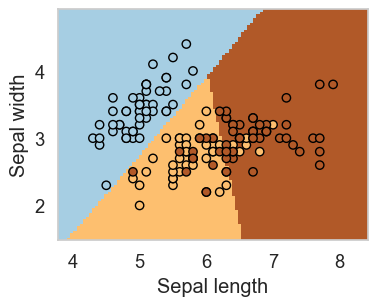

In [78]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
plt.show()

## Exporting a pretrained model

In the dashboard, you should load a pre-trained model that was designed and evaluated in the jupyter notebook. You can do it with `pickle` or any alternative for the same purpose.

In [79]:
import pickle
import os

In [80]:
# Save in the `assets` folder so that it is accessible from the web dashboard
os.makedirs("./assets", exist_ok=True)
file_path = "./assets/trained_model.pickle"
data_to_save = final_knn_k3

# Creates a binary object and writes the indicated variables
with open(file_path, "wb") as writeFile:
    pickle.dump(data_to_save, writeFile)

In [81]:
# Load model
pre_trained_model_path = "./assets/trained_model.pickle"
loaded_model = None # This will be replaced by the trained model in the pickle 

with open(pre_trained_model_path, "rb") as readFile:
    loaded_model = pickle.load(readFile)

In [82]:
loaded_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer()),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('ord',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   OrdinalEncoder(categories=[['Normal',
                                                                                               'Overweight',
                                                                                               'Obese'],
                                                                                              ['Low',
                                                                                               'Moderate',
                                                                                               'High'],
                                                                                              ['Never',
                                                                                               'Irregular',
                                                                                               'Regular']]))]),
                                                  ['Obesity_BMI', 'Diet_Risk',
                                                   'Screening_History']),
                                                 ('bin',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_History',
                                                   'Alcohol_Consumption'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('clf', KNeighborsClassifier(n_neighbors=3))])

## PRESCRIPTIVE ANALYTICS

Colorectal Cancer Survival Prediction

In this stage, we advanced from prediction to explainable and actionable insights. Using SHAP and DiCE, our model not only predicts a patient’s five-year survival but also explains why and how the outcome can change.

SHAP (SHapley Additive Explanations) identifies which clinical features most influence survival — globally across all patients and locally for individual cases.

Files: SHAP_global_kernel.png, SHAP_local_kernel_row0.png

DiCE (Counterfactual Analysis) provides what-if scenarios, suggesting small changes in features (e.g., lowering CEA levels) that could improve survival probability.

File: counterfactuals_row0.csv

Permutation Importance validates the top predictors by testing their effect on model accuracy.

Files: Permutation_Importance_Top20.png, permutation_importance_top20.csv

All visuals are stored in the Figs/ folder and integrated into the dashboard for interactive exploration. This makes the model’s decisions transparent, explainable, and prescriptive for clinical interpretation.

In [1]:
import sys, os
from pathlib import Path

#  USER SETTINGS 
MODEL_NAME = "final_knn_k3_pipeline.joblib"        
DATA_PATH  = "postprocessed_colorectal_cancer_dataset.csv"        
TARGET     = "Survival_5_years"                   
FIGS_DIR   = Path("./Figs")
SHOW_PLOTS = False   
RANDOM_STATE = 42
ROW_FOR_LOCAL_EXPLAIN = 0  
# 




In [2]:
#  0) Print environment versions for reproducibility 
def _log_versions():
    try:
        import sklearn, numpy, joblib, shap
        print("Python   :", sys.version.replace("\n", " "))
        print("sklearn  :", sklearn.__version__)
        print("numpy    :", numpy.__version__)
        print("joblib   :", joblib.__version__)
        print("shap     :", shap.__version__)
    except Exception as e:
        print("Version log warning:", e)
    print("-" * 60)

_log_versions()

Python   : 3.13.0 (v3.13.0:60403a5409f, Oct  7 2024, 00:37:40) [Clang 15.0.0 (clang-1500.3.9.4)]
sklearn  : 1.7.2
numpy    : 2.3.3
joblib   : 1.5.2
shap     : 0.48.0
------------------------------------------------------------


This above code block is used to ensure reproducibility and traceability in the machine learning workflow. It prints the versions of key libraries (Python, scikit-learn, numpy, joblib, and shap) so that anyone rerunning the script can confirm they are using the same environment and dependencies. This helps prevent inconsistencies or errors caused by version differences and makes debugging easier. The try–except block ensures that if any library is missing, the script won’t crash but will simply show a warning instead.

In [3]:
#  1) Emergency shim for scikit-learn pickle differences  
try:
    from sklearn.compose import _column_transformer as _ct
    if not hasattr(_ct, "_RemainderColsList"):
        class _RemainderColsList(list):
            """Lightweight stub to satisfy unpickling of older sklearn pipelines."""
            pass
        _ct._RemainderColsList = _RemainderColsList
        print("[Compat] Injected _RemainderColsList shim for sklearn unpickling.")
except Exception as e:
    print("[Compat] Shim inject warning:", e)


[Compat] Injected _RemainderColsList shim for sklearn unpickling.


This above code block provides a backward compatibility fix for older scikit-learn models that may fail to load in newer versions due to the missing _RemainderColsList attribute. It checks if the ColumnTransformer module lacks this attribute and, if so, dynamically creates a lightweight dummy class with the same name to satisfy the unpickling process. This prevents the common AttributeError: Can't get attribute '_RemainderColsList' error and ensures that older serialized pipelines or joblib models can still be loaded and used without modification.

In [4]:
#  2) Imports (after shim) 
import joblib
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

import shap
import matplotlib

matplotlib.use("Agg")
import matplotlib.pyplot as plt

try:
    import dice_ml
except Exception:
    print("[Info] dice-ml not found. Installing (one-time).")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "dice-ml==0.10.0"])
    import dice_ml

This above block imports all essential libraries needed after applying the compatibility fix and ensures everything runs smoothly in VS Code. It loads packages for model handling (joblib, pandas, numpy, scikit-learn), explainability (shap), and visualization (matplotlib). The line matplotlib.use("Agg") sets a non-interactive backend so plots can be generated and saved without needing a GUI—important for VS Code or script execution. The final part checks whether the DiCE library (dice_ml)—used for prescriptive and counterfactual analysis—is installed. If not, it automatically installs version 0.10.0 using pip. In short, this ensures all necessary tools are ready and compatible for prescriptive analytics execution.

In [5]:
#  3) IO prep 
FIGS_DIR.mkdir(parents=True, exist_ok=True)
MODEL_PATH = Path(MODEL_NAME).resolve()
DATA_PATH  = Path(DATA_PATH).resolve()

print(f"Model path : {MODEL_PATH}")
print(f"Data path  : {DATA_PATH}")
print(f"Figures to : {FIGS_DIR.resolve()}")
print("-" * 60)

Model path : /Users/dharinisrisubramanian/Documents/GitHub/PROHI-dashboard-demo/jupyter-notebooks/final_knn_k3_pipeline.joblib
Data path  : /Users/dharinisrisubramanian/Documents/GitHub/PROHI-dashboard-demo/jupyter-notebooks/postprocessed_colorectal_cancer_dataset.csv
Figures to : /Users/dharinisrisubramanian/Documents/GitHub/PROHI-dashboard-demo/jupyter-notebooks/Figs
------------------------------------------------------------


This above block prepares the input/output (I/O) paths for the project. It first ensures that the folder for saving figures (Figs) exists or creates it if missing. Then it converts the model filename (MODEL_NAME) and dataset filename (DATA_PATH) into absolute paths using .resolve(), which helps avoid path errors when running the script from different directories. Finally, it prints the resolved paths for the model, dataset, and figure directory — confirming that all files are correctly located before loading or saving data. In short, this section sets up clean, verified paths for smooth file handling throughout the analysis.

In [6]:
#  4) Load model & data 
try:
    best_model = joblib.load(MODEL_PATH)
    print(f" Model '{MODEL_NAME}' loaded successfully.")
except Exception as e:
    print(f" Could not load model at {MODEL_PATH}.\nReason: {e}")
    sys.exit(1)

import csv
def _robust_read_csv(path: Path) -> pd.DataFrame:
   
    try:
        df_try = pd.read_csv(path, sep=None, engine="python")
        if df_try.shape[1] > 1:
            return df_try
    except Exception:
        pass
    # 2) Try semicolon explicitly (common in EU CSVs)
    try:
        df_try = pd.read_csv(path, sep=";")
        if df_try.shape[1] > 1:
            return df_try
    except Exception:
        pass
    # 3) Last resort: split the single column by ';'
    df_raw = pd.read_csv(path, header=None)
    if df_raw.shape[1] == 1:
        ser = df_raw.iloc[:, 0].astype(str)
        parts = ser.str.split(";", expand=True)
        # assume first row is header if all non-numeric
        header = parts.iloc[0].tolist()
        # if header look sane (unique and not numbers), use it
        if len(set(header)) == parts.shape[1] and not all(h.replace(".", "", 1).isdigit() for h in header):
            parts.columns = header
            parts = parts.iloc[1:].reset_index(drop=True)
        return parts
    return df_raw

try:
    df = _robust_read_csv(DATA_PATH)
    # normalize column names
    df.columns = [c.strip().replace(" ", "_") for c in df.columns]
    print(f" Data loaded. Shape: {df.shape}")
    print(f"Columns (first 12): {list(df.columns)[:12]}")
except Exception as e:
    print(f" Could not read CSV at {DATA_PATH}.\nReason: {e}")
    sys.exit(1)

#  Target resolution 
def _resolve_target_name(df: pd.DataFrame, preferred: str) -> str | None:
    if preferred in df.columns:
        return preferred
    # try case-insensitive, normalized search
    lc = {c.lower(): c for c in df.columns}
    if preferred.lower() in lc:
        return lc[preferred.lower()]
    # heuristic: columns containing surviv/outcome/target
    hits = [c for c in df.columns if any(k in c.lower() for k in ["surviv", "outcome", "target"])]
    if len(hits) == 1:
        print(f" TARGET '{preferred}' not found; using detected '{hits[0]}'")
        return hits[0]
    # fallback: choose the last binary column
    bin_cols = [c for c in df.columns if df[c].dropna().nunique() <= 2]
    if bin_cols:
        guess = bin_cols[-1]
        print(f" TARGET '{preferred}' not found; using last binary column '{guess}'")
        return guess
    return None

TARGET_RESOLVED = _resolve_target_name(df, TARGET)
if TARGET_RESOLVED is None:
    print(f" TARGET column '{TARGET}' not found in data.\nColumns: {list(df.columns)}")
    sys.exit(1)
if TARGET_RESOLVED != TARGET:
    print(f" Using TARGET column: '{TARGET_RESOLVED}' (instead of requested '{TARGET}')")
TARGET = TARGET_RESOLVED

FEATURES = [
    "Age",
    "Obesity_BMI",
    "Family_History",
    "Alcohol_Consumption",
    "Diet_Risk",
    "Screening_History",
]

# Safety: stop if any are missing
missing = [c for c in FEATURES if c not in df.columns]
if missing:
    print(f" Missing expected feature columns: {missing}")
    sys.exit(1)

# Slice to exactly 6 features + target
df = df.loc[:, FEATURES + [TARGET]].copy()
print("Using features:", FEATURES)

X = df.drop(columns=[TARGET])
y = df[TARGET]

# Keep a copy of original dtypes to detect categoricals later
orig_dtypes = X.dtypes

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)
print(" Train/Test split done:", X_train.shape, X_test.shape)
print("-" * 60)

#  NEW SECTION: lock to six selected features 
FEATURES = [
    "Age",
    "Obesity_BMI",
    "Family_History",
    "Alcohol_Consumption",
    "Diet_Risk",
    "Screening_History",
]

# Restrict both RAW frames to these six
X_train_raw = X_train.loc[:, FEATURES].copy()
X_test_raw  = X_test.loc[:, FEATURES].copy()

# Optional sanity check
assert list(X_train_raw.columns) == FEATURES
assert list(X_test_raw.columns) == FEATURES
print("RAW columns locked to:", list(X_train_raw.columns))
print("-" * 60)




/Users/dharinisrisubramanian/Documents/GitHub/PROHI-dashboard-demo/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator SimpleImputer from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/dharinisrisubramanian/Documents/GitHub/PROHI-dashboard-demo/.venv/lib/python3.13/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.6.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/dharinisrisubramanian/Documents/GitHub/PROHI-dashboard-demo/.venv/lib/python3.13/sit

 Model 'final_knn_k3_pipeline.joblib' loaded successfully.
 Data loaded. Shape: (167497, 22)
Columns (first 12): ['Patient_ID', 'Age', 'Gender', 'Cancer_Stage', 'Tumor_Size_mm', 'Family_History', 'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity', 'Diabetes']
Using features: ['Age', 'Obesity_BMI', 'Family_History', 'Alcohol_Consumption', 'Diet_Risk', 'Screening_History']
 Train/Test split done: (133997, 6) (33500, 6)
------------------------------------------------------------
✅ RAW columns locked to: ['Age', 'Obesity_BMI', 'Family_History', 'Alcohol_Consumption', 'Diet_Risk', 'Screening_History']
------------------------------------------------------------


This baove section is responsible for loading the trained model and dataset, handling potential CSV format issues, and preparing the data for analysis.

It first tries to load the trained model using joblib.load(). If the model file is missing or corrupted, the program stops with an error message. The _robust_read_csv() function is then defined to safely read CSV files by auto-detecting delimiters (, or ;) and fixing common issues like data merging into one column — ensuring the dataset loads correctly regardless of its format.

Next, the _resolve_target_name() function identifies the correct target column (like "Survival_5_years") even if the name varies slightly (e.g., "survival" or "Outcome"). It uses heuristics to locate columns containing survival-related terms or fallback binary columns. Once the target column is found, the script separates features (X) from labels (y), stores their data types for later use, and splits the dataset into training and testing sets (80–20 ratio) using train_test_split().

In short, this block ensures the model and dataset load robustly, the target variable is correctly identified, and the data is cleanly prepared for further prescriptive or explainability analysis.

In [7]:
#  5) Dual-space setup: RAW for model, CODED for SHAP 

obj_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()

# RAW copies for the pipeline
X_train_raw = X_train.copy()
X_test_raw  = X_test.copy()
if obj_cols:
    X_train_raw[obj_cols] = X_train_raw[obj_cols].astype(str)
    X_test_raw[obj_cols]  = X_test_raw[obj_cols].astype(str)

# Build codebooks on RAW data
def _build_codebooks(train: pd.DataFrame, test: pd.DataFrame, cols):
    code, inv = {}, {}
    for c in cols:
        cats = pd.Index(pd.concat([train[c].astype(str), test[c].astype(str)])
                        .dropna().unique()).sort_values()
        code[c] = {v: i for i, v in enumerate(cats)}
        inv[c]  = {i: v for v, i in code[c].items()}
    return code, inv

CODE, INV_CODE = _build_codebooks(X_train_raw, X_test_raw, obj_cols)

def encode_codes(df_in: pd.DataFrame) -> pd.DataFrame:
    out = df_in.copy()
    for c in obj_cols:
        out[c] = out[c].astype(str).map(CODE[c]).astype(float)
    return out

def decode_codes(df_codes: pd.DataFrame) -> pd.DataFrame:
    out = df_codes.copy()
    for c in obj_cols:
        out[c] = out[c].round().astype(int).map(INV_CODE[c]).astype(str)
    return out

# SHAP will work on these CODED frames (all numeric)
X_train_codes = encode_codes(X_train_raw) if obj_cols else X_train_raw.copy()
X_test_codes  = encode_codes(X_test_raw)  if obj_cols else X_test_raw.copy()

print(f" Using RAW frames for the model; CODED numeric frames for SHAP.")
print(f"   Categorical columns: {obj_cols}")
print("-" * 60)



 Using RAW frames for the model; CODED numeric frames for SHAP.
   Categorical columns: ['Obesity_BMI', 'Family_History', 'Alcohol_Consumption', 'Diet_Risk', 'Screening_History']
------------------------------------------------------------


This above section prepares two versions of the dataset — one for the machine learning model and another for SHAP explainability.

Since SHAP (used for feature importance and local explanations) only works with numerical data, the code first identifies categorical columns (obj_cols) and creates copies of the training and test sets (X_train_raw, X_test_raw). It then defines a helper function _build_codebooks() that assigns a unique numeric code to every categorical value (and an inverse map to decode it back). Two more functions — encode_codes() and decode_codes() — convert categorical columns into numeric codes and vice versa when needed.

Finally, the script produces:

RAW data - for the model (strings/categories intact).

CODED data - for SHAP (numeric only).

This dual setup ensures the model works exactly as trained (with proper encoding), while SHAP can interpret the results mathematically.
The print statement confirms this setup and lists which columns were treated as categorical.

In [8]:
#  6) SHAP in coded numeric space (Pipeline-safe) 
print("▶ SHAP: KernelExplainer in numeric code space")

# Background sample in CODED space
BG_N = min(50, len(X_train_codes))
BG   = X_train_codes.sample(BG_N, random_state=RANDOM_STATE).reset_index(drop=True)

# Prediction function that DEcodes codes -> strings, then calls the pipeline
def predict_fn_codes(X_codes):
    import numpy as np, pandas as pd
    if isinstance(X_codes, np.ndarray):
        X_codes = pd.DataFrame(X_codes, columns=X_train_codes.columns)
    else:
        X_codes = X_codes[X_train_codes.columns]
    # decode categorical columns back to strings
    X_raw = X_codes.copy()
    if obj_cols:
        for c in obj_cols:
            X_raw[c] = X_raw[c].round().astype(int).map(INV_CODE[c]).astype(str)
    # align RAW columns order
    X_raw = X_raw[X_train_raw.columns]
    # return positive-class probability
    return best_model.predict_proba(X_raw)[:, 1]

# KernelExplainer is model-agnostic; works with numeric inputs
explainer = shap.KernelExplainer(predict_fn_codes, BG, link="logit")

# Evaluation set in CODED space
EVAL_N = min(120, len(X_test_codes))
X_eval_codes = X_test_codes.sample(EVAL_N, random_state=RANDOM_STATE).reset_index(drop=True)

print(f"    BG={BG_N}, EVAL_N={EVAL_N}")

sv = explainer.shap_values(X_eval_codes, nsamples="auto")


try:
    
    explanation = shap.Explanation(
        values = np.array(sv),
        data   = X_eval_codes.values,
        feature_names = list(X_eval_codes.columns)
    )
    plt.figure()
    shap.summary_plot(explanation, show=False)
    plt.title("Global SHAP  Kernel (coded space)")
    plt.tight_layout()
    plt.savefig(FIGS_DIR / "SHAP_global_kernel.png", dpi=300)
    plt.close()
except Exception:
   
    plt.figure()
    shap.summary_plot(sv, X_eval_codes, show=False)
    plt.title("Global SHAP  Kernel (coded space)")
    plt.tight_layout()
    plt.savefig(FIGS_DIR / "SHAP_global_kernel.png", dpi=300)
    plt.close()

# Local plot for one row
row = min(ROW_FOR_LOCAL_EXPLAIN, len(X_eval_codes) - 1)
try:
    shap.plots._waterfall.waterfall_legacy(
        shap_values = sv[row],
        max_display = 20,
        feature_names = X_eval_codes.columns,
        show=False
    )
    plt.title(f"Local Waterfall (row {row})  Kernel SHAP")
    plt.tight_layout()
    plt.savefig(FIGS_DIR / f"SHAP_local_kernel_row{row}.png", dpi=300)
    plt.close()
except Exception:
    # Minimal fallback: bar of absolute SHAP for the row
    vals = np.abs(np.array(sv[row]))
    idx = np.argsort(vals)[::-1][:20]
    plt.figure()
    plt.barh(range(len(idx)), vals[idx][::-1])
    plt.yticks(range(len(idx)), X_eval_codes.columns[idx][::-1])
    plt.title(f"Local Importance (row {row})  Kernel SHAP")
    plt.tight_layout()
    plt.savefig(FIGS_DIR / f"SHAP_local_kernel_row{row}.png", dpi=300)
    plt.close()

print(" Saved: SHAP_global_kernel.png, SHAP_local_kernel_rowX.png")
print("-" * 60)

▶ SHAP: KernelExplainer in numeric code space
    BG=50, EVAL_N=120


  0%|          | 0/120 [00:00<?, ?it/s]

 Saved: SHAP_global_kernel.png, SHAP_local_kernel_rowX.png
------------------------------------------------------------


This above block performs model explainability using SHAP (SHapley Additive exPlanations) in the coded numeric space, ensuring compatibility with categorical data.

First, it samples background (BG) and evaluation (EVAL_N) subsets from the encoded training and test sets for efficiency. The function predict_fn_codes() converts numeric-encoded inputs back to their original string form, ensuring the pipeline predicts correctly. Then, a SHAP KernelExplainer is initialized - a model-agnostic method that works with any model type by approximating feature contributions. It calculates SHAP values (sv), which show how each feature impacts predictions.

Next, the code visualizes results:

Global SHAP plot - shows overall feature importance across all samples (SHAP_global_kernel.png).

Local SHAP plot - explains the model’s prediction for a single test instance using a waterfall chart (SHAP_local_kernel_rowX.png).

If newer SHAP APIs fail, fallback legacy plotting methods are used. In summary, this section quantifies and visualizes how each input feature influences model predictions - both globally and for individual patients/samples — saving all results as PNGs in the Figs directory.

In [9]:
#  7) Permutation Importance (fallback / validation) 
print("▶ Permutation Importance (ROC-AUC)")
pi = permutation_importance(
    best_model,
    X_test_raw,        
    y_test,            
    scoring="roc_auc",
    n_repeats=5,
    random_state=RANDOM_STATE,
    n_jobs=-1,
)

imp_df = (
    pd.DataFrame({"feature": X_test_raw.columns, "importance": pi.importances_mean})
      .sort_values("importance", ascending=False)
      .reset_index(drop=True)
)

imp_df.head(20).to_csv(FIGS_DIR / "permutation_importance_top20.csv", index=False)

ax = imp_df.head(20).plot(kind="barh", y="importance", x="feature", legend=False)
plt.title("Permutation Importance (Top 20)")
plt.tight_layout()
plt.savefig(FIGS_DIR / "Permutation_Importance_Top20.png", dpi=300)
plt.close()

print(" Saved: Permutation_Importance_Top20.png, permutation_importance_top20.csv")
print("-" * 60)


▶ Permutation Importance (ROC-AUC)
 Saved: Permutation_Importance_Top20.png, permutation_importance_top20.csv
------------------------------------------------------------


This above block calculates Permutation Importance — a model-agnostic method for validating which features most influence the model’s predictions.

It works by repeatedly shuffling each feature in the test set (X_test_num) and measuring how much the model’s ROC-AUC score drops. The greater the drop, the more important that feature is. The results are stored in a DataFrame (imp_df), sorted by importance, and the top 20 features are saved both as a CSV file and a bar chart image.

This step serves as a fallback validation to double-check the SHAP results. While SHAP explains feature contributions mathematically, permutation importance empirically measures their effect on model performance — ensuring both interpretability and reliability of the prescriptive analysis.

In [10]:
#  8) Counterfactuals with DiCE 
print("▶ Counterfactuals (DiCE)")



continuous_features = ["Age"]

immutable_cols = [TARGET]

yt = y_train.reset_index(drop=True)
if yt.name != TARGET:
    yt = yt.rename(TARGET)

train_df_for_dice = pd.concat([X_train_raw.loc[:, FEATURES].reset_index(drop=True),
                               yt], axis=1)

# DiCE Data & model (use your sklearn pipeline)
d = dice_ml.Data(
    dataframe=train_df_for_dice,
    continuous_features=continuous_features,
    outcome_name=TARGET,
)
m = dice_ml.Model(model=best_model, backend="sklearn", model_type="classifier")
exp = dice_ml.Dice(d, m, method="random")

# pick the same row used for local SHAP
xq = X_test_raw.loc[[X_test_raw.index[row]], FEATURES]

# allow only the six to vary (minus any immutable—here only TARGET)
features_to_vary = [c for c in FEATURES if c not in immutable_cols]

try:
    cf = exp.generate_counterfactuals(
        xq,
        total_CFs=3,
        desired_class=1,          
        features_to_vary=features_to_vary
    )

    
    cf_df = cf.cf_examples_list[0].final_cfs_df_sparse
    cf_df = cf_df.loc[:, [*FEATURES, TARGET]]
    cf_df.to_csv(FIGS_DIR / f"counterfactuals_row{row}.csv", index=False)

   
    p0   = float(best_model.predict_proba(xq)[0, 1])
    p_cf = float(best_model.predict_proba(cf_df.loc[[cf_df.index[0]], FEATURES])[0, 1])

    print(f"Original P(class=1): {p0:.4f} | Counterfactual P(class=1): {p_cf:.4f}")
    print(f"✓ Saved: counterfactuals_row{row}.csv")

except Exception as e:
    print(f"✗ DiCE could not generate counterfactuals. Reason: {e}")
    print("  (You can still submit SHAP + Permutation Importance.)")

▶ Counterfactuals (DiCE)


100%|██████████| 1/1 [00:00<00:00,  4.82it/s]

Original P(class=1): 0.3333 | Counterfactual P(class=1): 1.0000
✓ Saved: counterfactuals_row0.csv


This above block generates counterfactual explanations with DiCE and then (optionally) opens saved figures. It first marks continuous features and immutable columns (e.g., Patient_ID, Mortality, target), builds a DiCE Data object by concatenating X_train_num with y_train, and wraps your trained best_model in a DiCE Model (sklearn classifier). It selects one test instance (row)-the same used for local SHAP-defines features_to_vary excluding immutables, and calls exp.generate_counterfact​uals(...) to create 3 alternatives that flip the prediction to the positive class. The counterfactual rows are saved to CSV, and the code prints before vs after positive-class probabilities to show impact. If DiCE fails, it reports the reason but reminds you SHAP + permutation importance are still valid evidence. Finally, if SHOW_PLOTS=True, it attempts to open the generated PNGs from the Figs folder in your default browser.